# LET'S DO CRIME BBY >:3

# 2.2 Importing Packages and Read the Data

In [188]:
# General Packages

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import datetime as dt
import seaborn as sns
from pylab import rcParams
%matplotlib inline
rcParams["figure.figsize"] = 12, 8


In [190]:
path = 'dataset/Crime_Data_2010_2017.csv'

In [191]:
crime = pd.read_csv(path)

# 3. Visualization

## 3.1. General Shape

In [192]:
crime.shape

(1584316, 26)

In [193]:
crime.head()


,DR Number,Date Reported,Date Occurred,Time Occurred,Area ID,Area Name,Reporting District,Crime Code,Crime Code Description,MO Codes,...,Weapon Description,Status Code,Status Description,Crime Code 1,Crime Code 2,Crime Code 3,Crime Code 4,Address,Cross Street,Location
0,1208575,03/14/2013,03/11/2013,1800,12,77th Street,1241,626,INTIMATE PARTNER - SIMPLE ASSAULT,0416 0446 1243 2000,...,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",AO,Adult Other,626.0,NaN,NaN,NaN,6300 BRYNHURST AV,NaN,"(33.9829, -118.3338)"
1,102005556,01/25/2010,01/22/2010,2300,20,Olympic,2071,510,VEHICLE - STOLEN,NaN,...,NaN,IC,Invest Cont,510.0,NaN,NaN,NaN,VAN NESS,15TH,"(34.0454, -118.3157)"
2,418,03/19/2013,03/18/2013,2030,18,Southeast,1823,510,VEHICLE - STOLEN,NaN,...,NaN,IC,Invest Cont,510.0,NaN,NaN,NaN,200 E 104TH ST,NaN,"(33.942, -118.2717)"
3,101822289,11/11/2010,11/10/2010,1800,18,Southeast,1803,510,VEHICLE - STOLEN,NaN,...,NaN,IC,Invest Cont,510.0,NaN,NaN,NaN,88TH,WALL,"(33.9572, -118.2717)"
4,42104479,01/11/2014,01/04/2014,2300,21,Topanga,2133,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),0329,...,NaN,IC,Invest Cont,745.0,NaN,NaN,NaN,7200 CIRRUS WY,NaN,"(34.2009, -118.6369)"


In [194]:
crime.tail()

,DR Number,Date Reported,Date Occurred,Time Occurred,Area ID,Area Name,Reporting District,Crime Code,Crime Code Description,MO Codes,...,Weapon Description,Status Code,Status Description,Crime Code 1,Crime Code 2,Crime Code 3,Crime Code 4,Address,Cross Street,Location
1584311,172116482,09/07/2017,09/07/2017,1005,21,Topanga,2141,440,THEFT PLAIN - PETTY ($950 & UNDER),0344,...,NaN,IC,Invest Cont,440.0,NaN,NaN,NaN,23800 CALVERT ST,NaN,"(34.1883, -118.6536)"
1584312,172116489,09/07/2017,09/07/2017,1200,21,Topanga,2156,330,BURGLARY FROM VEHICLE,0344 1605,...,NaN,IC,Invest Cont,330.0,NaN,NaN,NaN,6600 TOPANGA CANYON BL,NaN,"(34.1905, -118.6059)"
1584313,172116491,08/30/2017,07/15/2017,1,21,Topanga,2147,649,DOCUMENT FORGERY / STOLEN FELONY,0930 1822,...,NaN,IC,Invest Cont,649.0,NaN,NaN,NaN,20900 SHERMAN WY,NaN,"(34.201, -118.5885)"
1584314,172116498,09/08/2017,09/08/2017,1845,21,Topanga,2136,946,OTHER MISCELLANEOUS CRIME,1402,...,NaN,IC,Invest Cont,946.0,998.0,NaN,NaN,REMMET,WYANDOTTE,"(34.2029, -118.6003)"
1584315,172116510,09/08/2017,07/12/2017,2230,21,Topanga,2105,236,INTIMATE PARTNER - AGGRAVATED ASSAULT,0400 1813 2000,...,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",IC,Invest Cont,236.0,NaN,NaN,NaN,8600 INTERNATIONAL AV,NaN,"(34.2258, -118.5994)"


## 3.2. Date of Crime Reported and Crime Occurred

In [195]:
# Formatting to datetime object
try:
    date_reported = [dt.datetime.strptime(d, "%m/%d/%Y").date() for d in crime["Date Reported"]]
except:
    print("Already converted Date Reported")
    
try:
    date_occurred = [dt.datetime.strptime(d, "%m/%d/%Y").date() for d in crime["Date Occurred"]]
except:
    print("Already converted Date Occurred")
    
# Reassign the date reported and occurred columns
crime["Date Reported"] = np.array(date_reported)
crime["Date Occurred"] = np.array(date_occurred)

### 3.2.1. Crime by Specific Periods

In [196]:
# Making lists of days, months, and years for reported from datetime objects
day_reported = [d.isoweekday() for d in crime["Date Reported"]]
mon_reported = [d.month for d in crime["Date Reported"]]
year_reported = [d.year for d in crime["Date Reported"]]
# Making new columns for each
crime["Day Reported"] = np.array(day_reported)
crime["Month Reported"] = np.array(mon_reported)
crime["Year Reported"] = np.array(year_reported)

In [197]:
# Making lists of days, months, and years for occurred from datetime objects
day_occurred = [d.isoweekday() for d in crime["Date Occurred"]]
mon_occurred = [d.month for d in crime["Date Occurred"]]
year_occurred = [d.year for d in crime["Date Occurred"]]
# Making new columns for each
crime["Day Occurred"] = np.array(day_occurred)
crime["Month Occurred"] = np.array(mon_occurred)
crime["Year Occurred"] = np.array(year_occurred)

#### 3.2.1.1. Crime by Day of the Week

##### 3.2.1.1.1. Crime Reported by Day

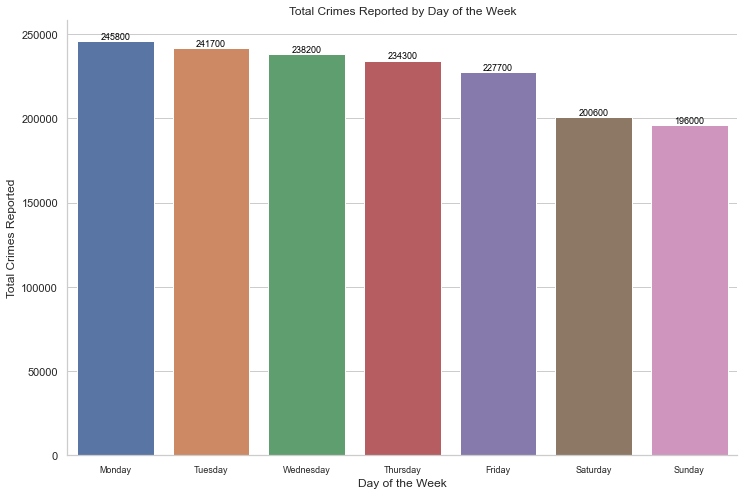

In [198]:
fig, ax = plt.subplots()
# Plotting crimes reported by day
sns.barplot(x=crime["Day Reported"].value_counts().index, y=crime["Day Reported"].value_counts())
# Axes
ax.set_title("Total Crimes Reported by Day of the Week")
ax.set_xticklabels(["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"], fontsize=9)
ax.set_xlabel("Day of the Week")
ax.set_ylabel("Total Crimes Reported")
# Adding values
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % round(int(p.get_height()), -2), 
            fontsize=9, color='black', ha='center', va='bottom')
sns.despine()

##### 3.2.1.1.2. Crime Occurred by Day

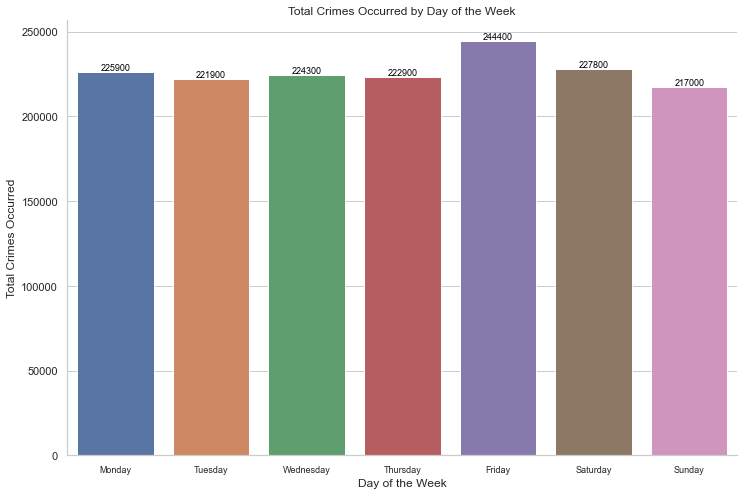

In [199]:
fig, ax = plt.subplots()
# Plotting crimes occurred by day
sns.barplot(x = crime["Day Occurred"].value_counts().index, y = crime["Day Occurred"].value_counts())
# Axes
ax.set_title("Total Crimes Occurred by Day of the Week")
ax.set_xticklabels(["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"], fontsize=9)
ax.set_xlabel("Day of the Week")
ax.set_ylabel("Total Crimes Occurred")
# Adding values
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % round(int(p.get_height()), -2), 
            fontsize=9, color='black', ha='center', va='bottom')
sns.despine()

##### 3.2.1.1.3. Comparing Crime Reported and Occured by Day Side to Side

In [200]:
# Making a new dataframe
df1 = pd.DataFrame({
    "Day" : list(crime["Day Reported"].value_counts().index),
    "Crime Occurred" : list(crime["Day Occurred"].value_counts()),
    "Crime Reported" : list(crime["Day Reported"].value_counts())
})
dayrepocc = df1.set_index("Day").stack().reset_index().rename(columns={"level_1" : "Variable", 0 : "Crime"})

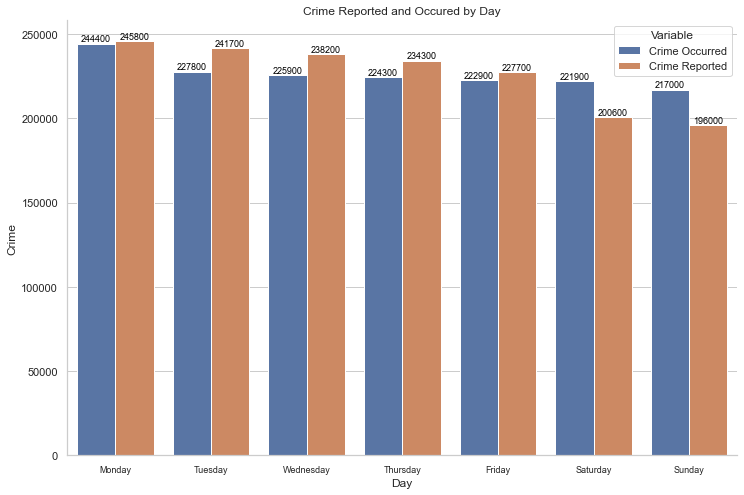

In [201]:
fig, ax = plt.subplots()
# Plotting side by side crime rep and occ by day
sns.barplot(x = "Day", y = "Crime", hue = "Variable", data=dayrepocc, ax=ax)
# Axes
ax.set_title("Crime Reported and Occured by Day")
ax.set_xticklabels(["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"], fontsize=9)
ax.set_ylabel("Crime")
# Adding values
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % round(int(p.get_height()), -2), 
            fontsize=9, color='black', ha='center', va='bottom')
sns.despine(fig)

#### 3.2.1.2. Crime by Month

##### 3.2.1.2.1. Crime Reported by Month

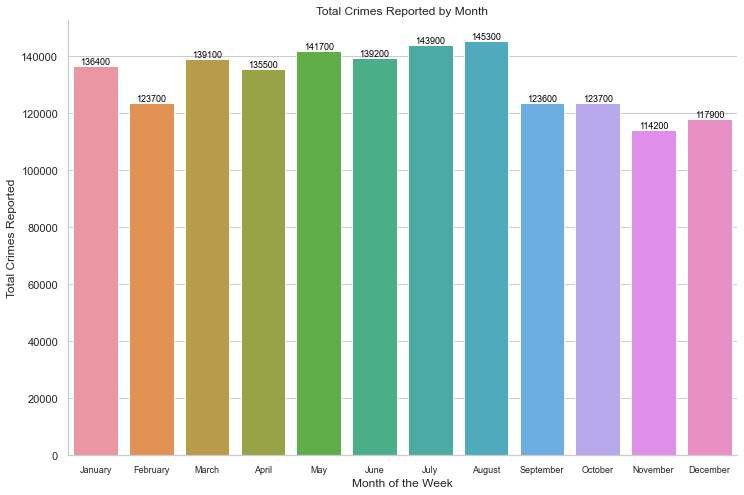

In [202]:
fig, ax = plt.subplots()
# Plotting crimes reported by month
sns.barplot(x = crime["Month Reported"].value_counts().index, y = crime["Month Reported"].value_counts())
# Axes
ax.set_title("Total Crimes Reported by Month")
ax.set_xticklabels(["January", "February", "March", "April", "May", "June",
                    "July", "August", "September", "October", "November", "December"], fontsize=9)
ax.set_xlabel("Month of the Week")
ax.set_ylabel("Total Crimes Reported")
# Adding Values
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % round(int(p.get_height()), -2), 
            fontsize=9, color='black', ha='center', va='bottom')
sns.despine()

##### 3.2.1.2.2. Crime Occurred by Month

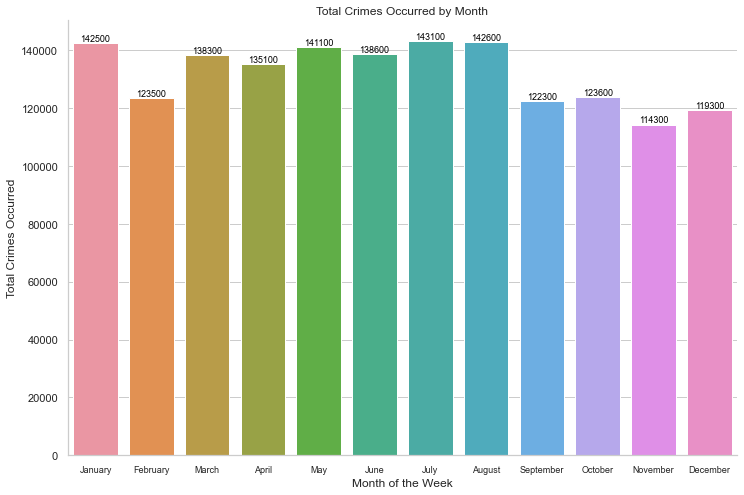

In [203]:
fig, ax = plt.subplots()
# Plotting crimes occurred by month
sns.barplot(x=crime["Month Occurred"].value_counts().index, y=crime["Month Occurred"].value_counts())
# Axes
ax.set_title("Total Crimes Occurred by Month")
ax.set_xticklabels(["January", "February", "March", "April", "May", "June",
                    "July", "August", "September", "October", "November", "December"], fontsize=9)
ax.set_xlabel("Month of the Week")
ax.set_ylabel("Total Crimes Occurred")
# Adding values
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % round(int(p.get_height()), -2), 
            fontsize=9, color='black', ha='center', va='bottom')
sns.despine()

##### 3.2.1.2.3. Comparing Crime Reported and Occurred by Month Side by Side

In [204]:
# Making a new dataframe
df2 = pd.DataFrame({
    "Month" : list(crime["Month Reported"].value_counts().index),
    "Crime Reported" : list(crime["Month Reported"].value_counts()),
    "Crime Occurred" : list(crime["Month Occurred"].value_counts())
})
monrepocc = df2.set_index("Month").stack().reset_index().rename(columns={"level_1" : "Variable", 0 : "Crime"})

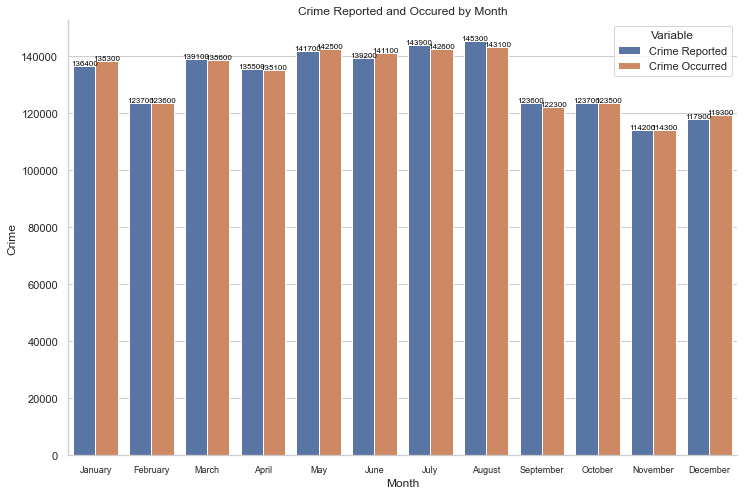

In [205]:
fig, ax = plt.subplots()
# Plotting side by side crime rep and occ by day
sns.barplot(x = "Month", y = "Crime", hue = "Variable", data=monrepocc, ax=ax)
# Axes
ax.set_title("Crime Reported and Occured by Month")
ax.set_xticklabels(["January", "February", "March", "April", "May", "June",
                    "July", "August", "September", "October", "November", "December"], fontsize=9)
ax.set_ylabel("Crime")
# Adding values
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % round(int(p.get_height()), -2), 
            fontsize=8, color='black', ha='center', va='bottom')
sns.despine(fig)

#### 3.2.1.3. Crime by Year

##### 3.2.1.3.1. Crime Reported by Year

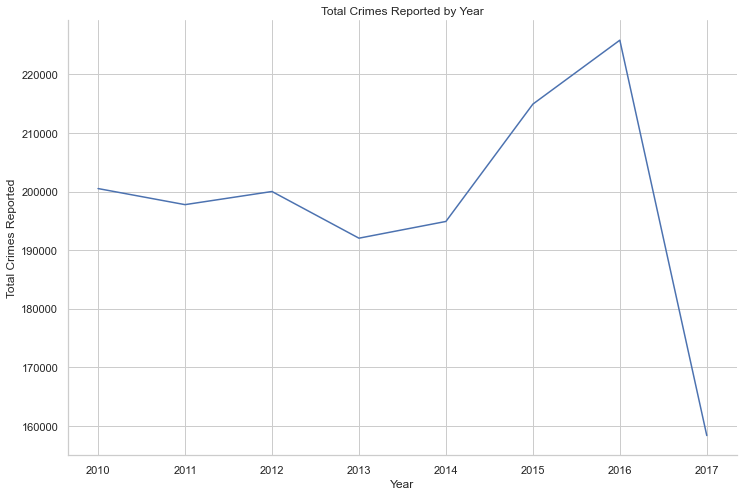

In [206]:
fig, ax = plt.subplots()
# Plotting crimes reported by year
plt.plot(crime["Year Reported"].value_counts().sort_index().index, crime["Year Reported"].value_counts().sort_index())
# Axes
ax.set_title("Total Crimes Reported by Year")
ax.set_xlabel("Year")
ax.set_ylabel("Total Crimes Reported")
sns.despine()

##### 3.2.1.3.2. Crime Occurred by Year

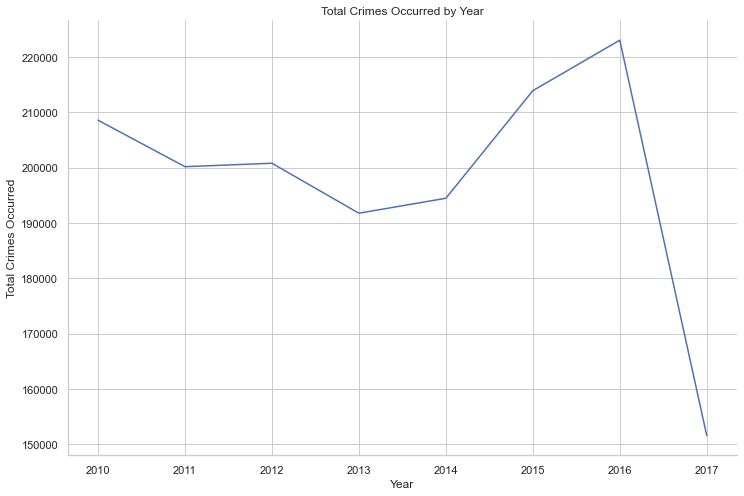

In [207]:
fig, ax = plt.subplots()
# Plotting crimes occured by year
plt.plot(crime["Year Occurred"].value_counts().sort_index().index, crime["Year Occurred"].value_counts().sort_index())
# AXes
ax.set_title("Total Crimes Occurred by Year")
ax.set_xlabel("Year")
ax.set_ylabel("Total Crimes Occurred")
sns.despine()

##### 3.2.1.3.3. Comparing Crime Reported and Occured by Year Side to Side

In [208]:
# Making a new dataframe
df3 = pd.DataFrame({
    "Year" : list(crime["Year Reported"].value_counts().index),
    "Crime Reported" : list(crime["Year Reported"].value_counts()),
    "Crime Occurred" : list(crime["Year Occurred"].value_counts())
})
yearrepocc = df3.set_index("Year").stack().reset_index().rename(columns={"level_1" : "Variable", 0 : "Crime"})

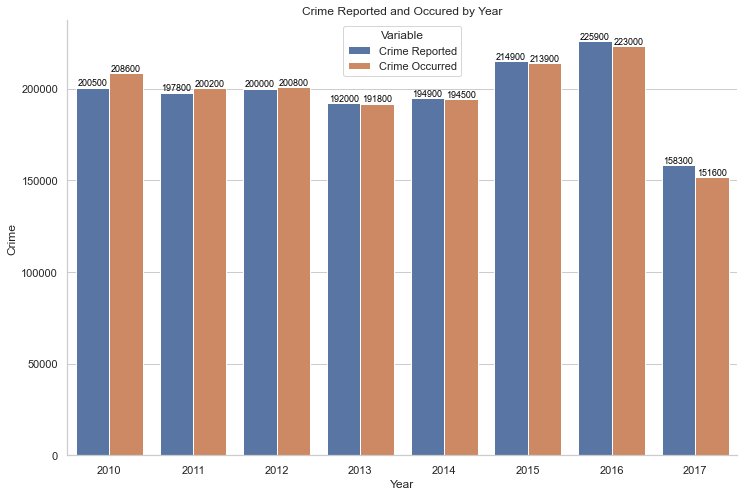

In [209]:
fig, ax = plt.subplots()
# Plotting side by side crime rep and occ by day
sns.barplot(x = "Year", y = "Crime", hue = "Variable", data=yearrepocc, ax=ax)
# Axes
ax.set_title("Crime Reported and Occured by Year")
ax.set_ylabel("Crime")
# Adding values
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % round(int(p.get_height()), -2), 
            fontsize=9, color='black', ha='center', va='bottom')
sns.despine(fig)

### 3.2.2. Crime Chronologically

#### 3.2.2.1. Crimes Over Time

##### 3.2.2.1.1. Crimes Reported Over Time

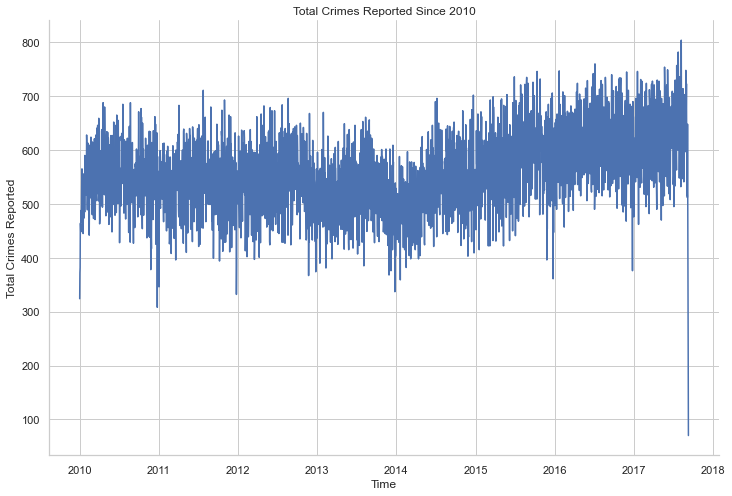

In [210]:
fig, ax = plt.subplots()
# Plot crimes reported over time
plt.plot(crime["Date Reported"].value_counts().sort_index().index, crime["Date Reported"].value_counts().sort_index())
# Axes
ax.set_title("Total Crimes Reported Since 2010")
ax.set_xlabel("Time")
ax.set_ylabel("Total Crimes Reported")
sns.despine()

##### Crimes Occurred Over Time

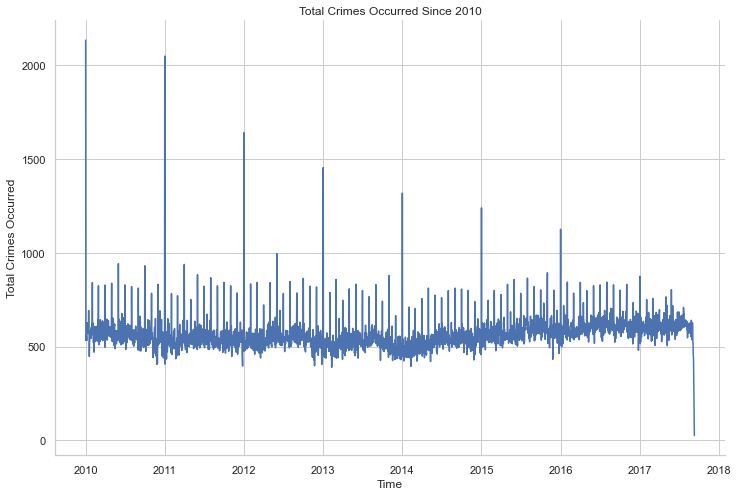

In [211]:
fig, ax = plt.subplots()
# Plot crimes occurred over time
plt.plot(crime["Date Occurred"].value_counts().sort_index().index, crime["Date Occurred"].value_counts().sort_index())
# Axes
ax.set_title("Total Crimes Occurred Since 2010")
ax.set_xlabel("Time")
ax.set_ylabel("Total Crimes Occurred")
sns.despine()

#### 3.2.2.2. Crimes Over Time by Month and Year

##### 3.2.2.2.1. Crimes Reported over Time by Month and Year

In [212]:
# Strip the month and the year as string
month_year_rep = [str(m)+"/"+str(y) for m,y in zip(crime["Month Reported"], crime["Year Reported"])]
# Make them date time objects as a list
month_year_rep_formatted = [dt.datetime.strptime(d, "%m/%Y") for d in month_year_rep]
# Turn the list of datetime month and year into a new column
crime["Month Year Rep"] = np.array(month_year_rep_formatted)

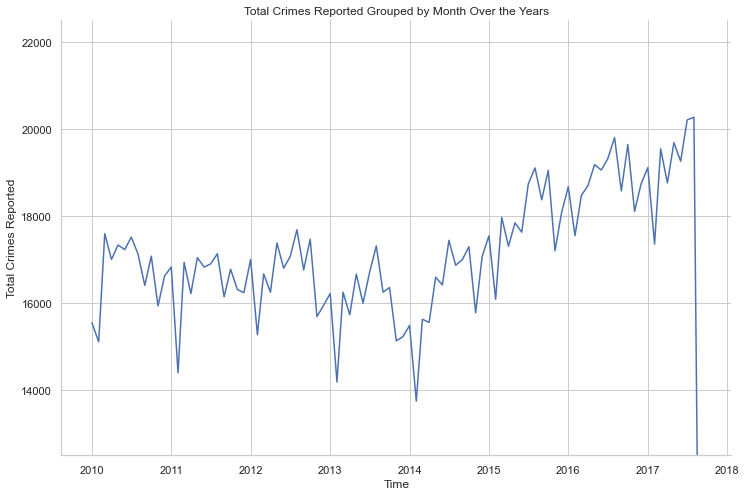

In [213]:
fig, ax = plt.subplots()
# Plot crimes reported over months and years
plt.plot(crime["Month Year Rep"].value_counts().sort_index().index, crime["Month Year Rep"].value_counts().sort_index())
# Axes
ax.set_title("Total Crimes Reported Grouped by Month Over the Years")
ax.set_ylim(12500, 22500)
ax.set_xlabel("Time")
ax.set_ylabel("Total Crimes Reported")
sns.despine()

##### 3.2.2.2.2. Crimes Occurred over Time by Month and Year

In [214]:
# Strip the month and the year as string
month_year_occ = [str(m)+"/"+str(y) for m,y in zip(crime["Month Occurred"], crime["Year Occurred"])]
# Make them date time objects as a list
month_year_occ_formatted = [dt.datetime.strptime(d, "%m/%Y") for d in month_year_occ]
# Turn the list of datetime month and year into a new column
crime["Month Year Occ"] = np.array(month_year_occ_formatted)

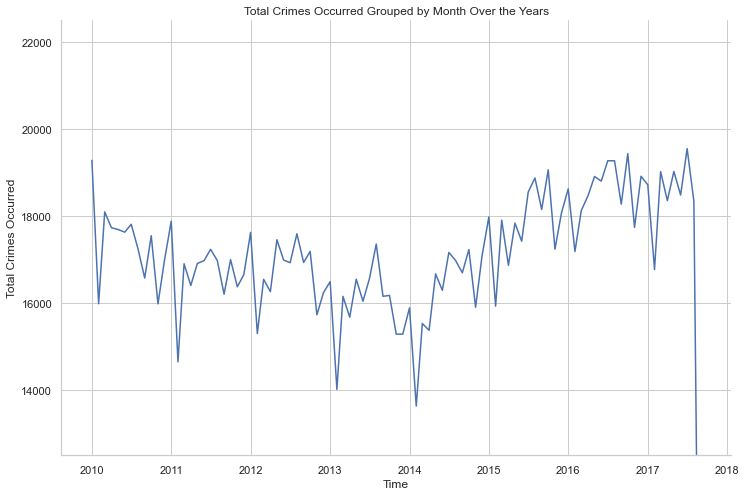

In [215]:
fig, ax = plt.subplots()
# Plot crimes occurred over months and years
plt.plot(crime["Month Year Occ"].value_counts().sort_index().index, crime["Month Year Occ"].value_counts().sort_index())
# Axes
ax.set_title("Total Crimes Occurred Grouped by Month Over the Years")
ax.set_ylim(12500, 22500)
ax.set_xlabel("Time")
ax.set_ylabel("Total Crimes Occurred")
sns.despine()

In [216]:
def makemil(time):
    ntime = ""
    if len(str(time)) == 1:
        ntime = "000" + str(time)
    if len(str(time)) == 2:
        ntime = "00" + str(time)
    if len(str(time)) == 3:
        ntime = "0" + str(time)
    if len(str(time)) == 4:
        ntime = str(time)
    return ntime

def returnhour(miltime):
    return miltime[:2]

In [217]:
# Formatting to 4 char string
crime["Time Occurred"] = crime["Time Occurred"].apply(makemil)

### Crime Throughout the Day

In [218]:
# Formatting to int so it can be sorted
crime["Time Occurred Int"] = crime["Time Occurred"].apply(int)

C:\Users\jaron\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


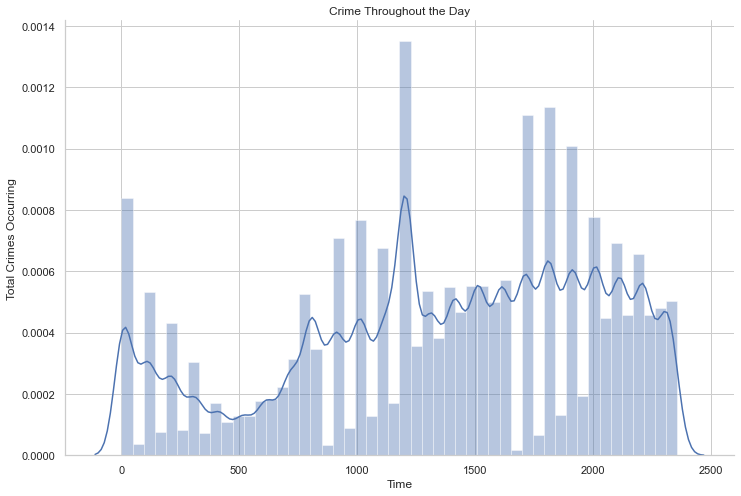

In [219]:
fig, ax = plt.subplots()
# Plot crime throughout a single day hours
sns.distplot(crime["Time Occurred Int"])
# Axes
ax.set_title("Crime Throughout the Day")
ax.set_xlabel("Time")
ax.set_ylabel("Total Crimes Occurring")
sns.despine()

###  Crime Throughout the Day by the Hour

In [220]:
# Extracting the hour out from time
crime["Hour Occurred"] = crime["Time Occurred"].apply(returnhour)

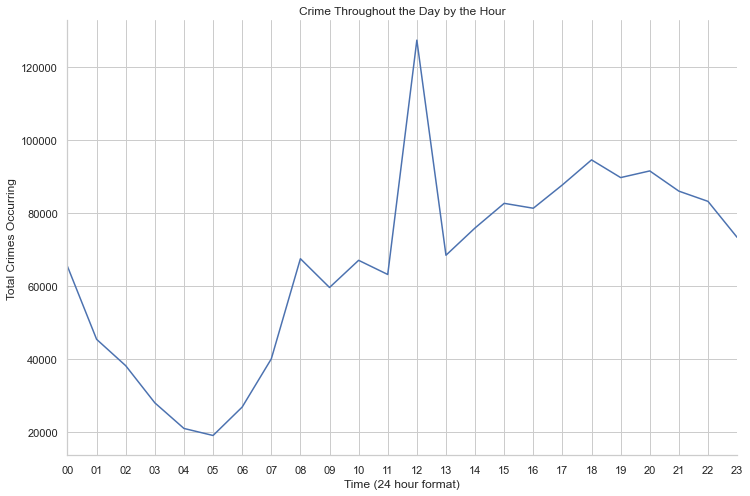

In [221]:
fig, ax = plt.subplots()
# Crime through the hours
plt.plot(crime["Hour Occurred"].value_counts().sort_index().index, crime["Hour Occurred"].value_counts().sort_index())
# Axes
ax.set_title("Crime Throughout the Day by the Hour")
plt.xticks(range(24))
plt.xlim(0,23)
plt.xlabel("Time (24 hour format)")
plt.ylabel("Total Crimes Occurring")
sns.despine()

## 3.3. Area Name

C:\Users\jaron\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


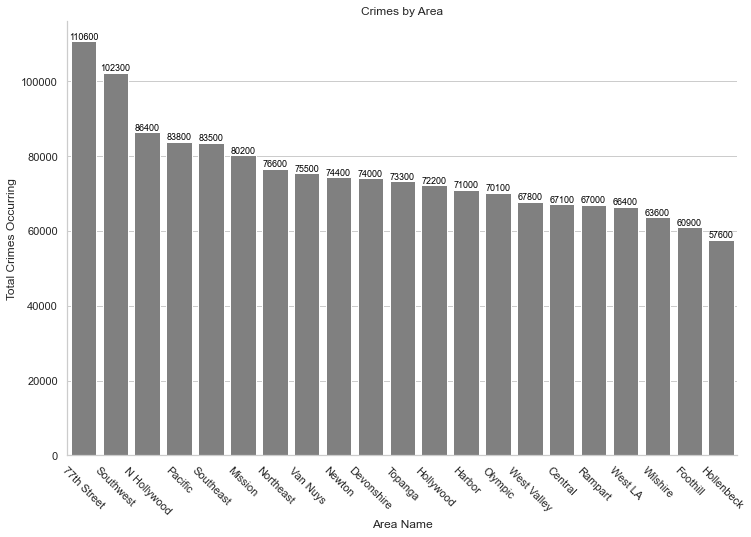

In [222]:
fig, ax = plt.subplots()
# Plotting crimes by neighborhood area
sns.barplot(crime["Area Name"].value_counts().index, crime["Area Name"].value_counts(), color="gray", ax=ax)
# Axes
ax.set_title("Crimes by Area")
ax.set_xticklabels(ax.get_xticklabels(), rotation=-45)
ax.set_xlabel("Area Name")
ax.set_ylabel("Total Crimes Occurring")
# Adding Values
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % round(int(p.get_height()), -2), 
            fontsize=9, color='black', ha='center', va='bottom')
sns.despine()

## 3.4. Crime Code

In [223]:
# Tally total of top 20 crimes
crime["Crime Code Description"].value_counts().head(20)

BATTERY - SIMPLE ASSAULT                                        145767
VEHICLE - STOLEN                                                121329
BURGLARY FROM VEHICLE                                           121318
BURGLARY                                                        114751
THEFT PLAIN - PETTY ($950 & UNDER)                              113709
THEFT OF IDENTITY                                               100653
INTIMATE PARTNER - SIMPLE ASSAULT                                85908
VANDALISM - FELONY ($400 & OVER, ALL CHURCH VANDALISMS) 0114     79433
VANDALISM - MISDEAMEANOR ($399 OR UNDER)                         71523
ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT                   67631
THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER)                  63995
ROBBERY                                                          63408
THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOWL,LIVESTK,PROD0036     56377
CRIMINAL THREATS - NO WEAPON DISPLAYED                           44560
SHOPLI

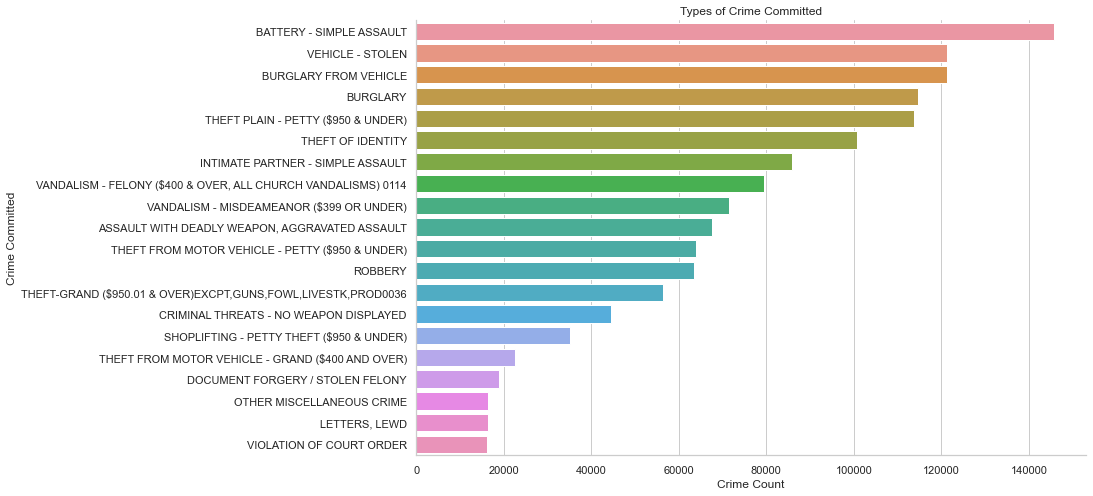

In [224]:
# Since the number of unique crimes are more than 100, plot top 20
fig, ax = plt.subplots()
# Plotting crimes by type
sns.barplot(y=crime["Crime Code Description"].value_counts().index[0:20], 
                 x=crime["Crime Code Description"].value_counts().head(20), ax=ax)
# Axes
ax.set_title("Types of Crime Committed")
ax.set_xlabel("Crime Count")
ax.set_ylabel("Crime Committed")
sns.despine()

## 3.3. MO Codes

In [225]:
# Splitting the MO codes per whitespace
MO_list = []
for item in crime["MO Codes"].dropna():
    MO_list.append(str(item).split())

In [226]:
# Making a new DataFrame for MO Codes
tempo_MO_split = []
for i in MO_list:
    for j in i:
        tempo_MO_split.append("MO "+j)
        
tempo_MO_split = np.array(tempo_MO_split)

pre_MO_df = [["","MO Codes"]]
for i in range(len(tempo_MO_split)):
    pre_MO_df.append([i, tempo_MO_split[i]])
    
pre_MO_data = np.array(pre_MO_df)

post_MO_df = pd.DataFrame(data=pre_MO_data[1:,1:],
                  index=pre_MO_data[1:,0],
                  columns=pre_MO_data[0,1:])

C:\Users\jaron\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


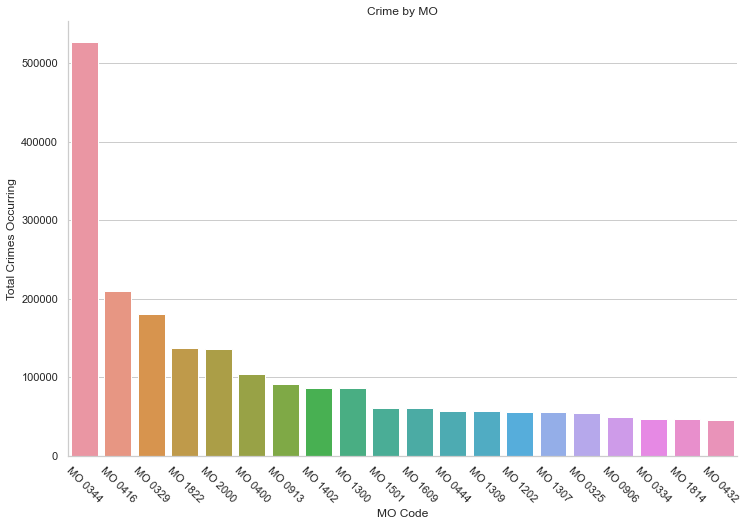

In [227]:
fig, ax = plt.subplots()
# Looking into crime by MO
sns.barplot(post_MO_df["MO Codes"].value_counts().index[:20], post_MO_df["MO Codes"].value_counts().head(20), ax=ax)
# Axes
ax.set_title("Crime by MO")
ax.set_xticklabels(ax.get_xticklabels(), rotation=-45)
ax.set_xlabel("MO Code")
ax.set_ylabel("Total Crimes Occurring")
sns.despine()

## 3.4. Victim Age

In [228]:
# Basic stats about Victim Age
crime["Victim Age"].describe()[1:]

mean    35.934195
std     16.811559
min     10.000000
25%     23.000000
50%     34.000000
75%     48.000000
max     99.000000
Name: Victim Age, dtype: float64

C:\Users\jaron\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


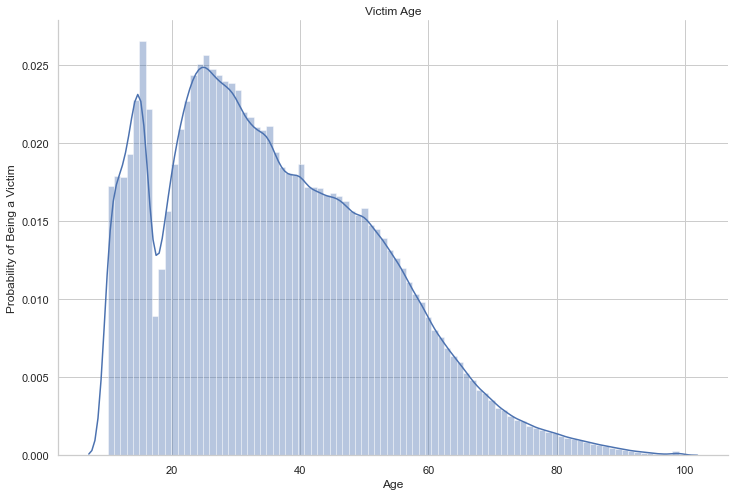

In [229]:
fig, ax = plt.subplots()
# Plotting victim's age distribution
sns.distplot(crime["Victim Age"].dropna(), bins=90, ax=ax)
# Axes
ax.set_title("Victim Age")
ax.set_xlabel("Age")
ax.set_ylabel("Probability of Being a Victim")
sns.despine()

Mean of the victims are 35, and is supported by a median of 34.

## 3.4. Victim Sex

In [230]:
# Victim Sex Demographics
crime["Victim Sex"].value_counts()                                

M    739581
F    675402
X     24080
H        53
-         1
Name: Victim Sex, dtype: int64

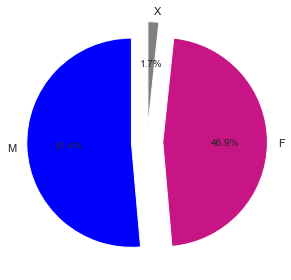

In [231]:
fig, ax = plt.subplots(figsize=(6,4))
# Plotting piechart of victim sex
ax.pie(crime["Victim Sex"].value_counts()[:3],labels=crime["Victim Sex"].value_counts()[:3].index, startangle=90, 
       explode=(0.15,0.15,.15), autopct="%0.1f%%", colors=("blue","mediumvioletred","gray"))
fig.tight_layout()

## 3.4. Victim Descent

In [232]:
# Changing the abbreviations to the whole description
Victims_bg = {
    "A": "Other Asian",
    "B": "Black",
    "C": "Chinese",
    "D": "Cambodian",
    "F": "Filipino",
    "G": "Guamanian",
    "H": "Hispanic/Latin/Mexican",
    "I": "American Indian/Alaskan Native",
    "J": "Japanese",
    "K": "Korean",
    "L": "Laotian",
    "O": "Other",
    "P": "Pacific Islander",
    "S": "Samoan",
    "U": "Hawaiian",
    "V": "Vietnamese",
    "W": "White",
    "X": "Unknown",
    "Z": "Asian Indian"
}
crime["Victim Descent"] = crime["Victim Descent"].map(Victims_bg)

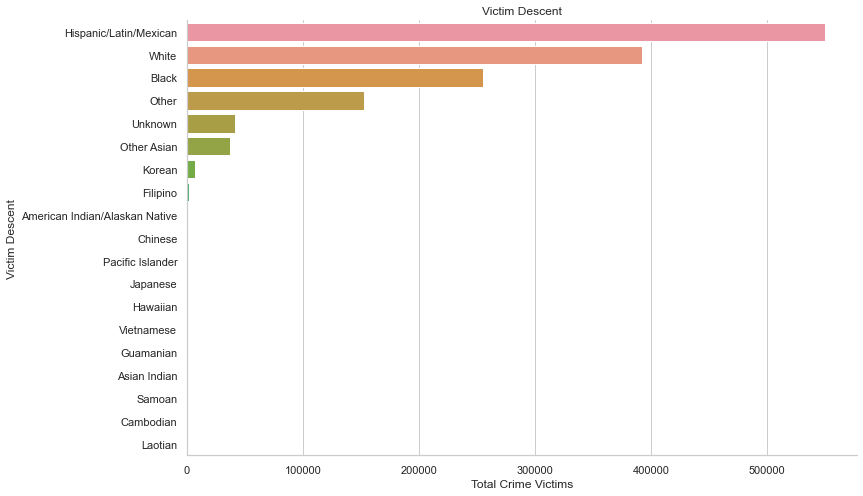

In [233]:
fig, ax = plt.subplots()
# Plotting by victim gescent generally
sns.barplot(y=crime["Victim Descent"].value_counts().index, x=crime["Victim Descent"].value_counts(), ax=ax)
# Axes
ax.set_title("Victim Descent")
ax.set_xlabel("Total Crime Victims")
ax.set_ylabel("Victim Descent")
sns.despine()

## 3.5. Premise Description

In [234]:
# Previewing the total tally
crime["Premise Description"].value_counts()

STREET                                          352160
SINGLE FAMILY DWELLING                          328198
MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)    204980
PARKING LOT                                     112576
SIDEWALK                                         79247
                                                 ...  
GREEN LINE (I-105 FWY LEVEL TRAIN)                   1
TACTICAL SIGNIFICANCE                                1
NUCLEAR FACILITY                                     1
DEPT OF DEFENSE FACILITY                             1
REDLINE SUBWAY TUNNEL                                1
Name: Premise Description, Length: 210, dtype: int64

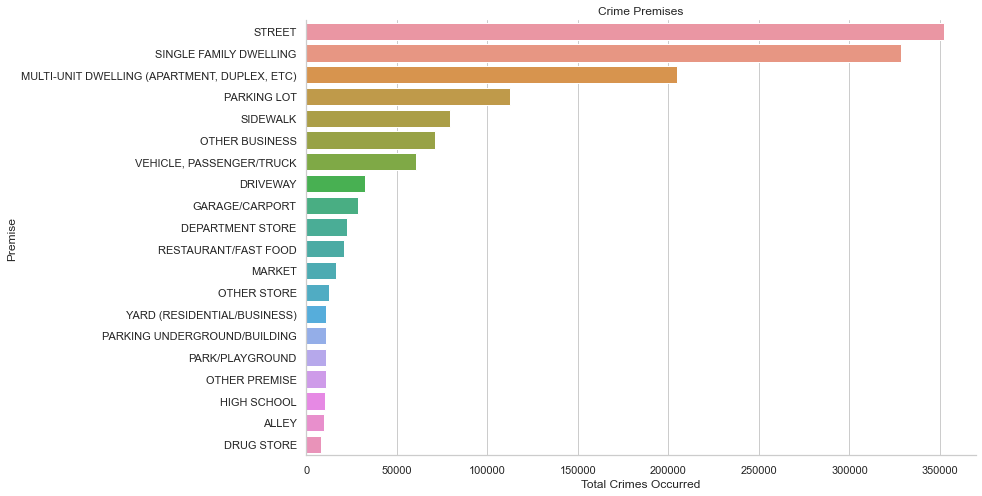

In [235]:
# We will only be looking at the top 20 premises
fig, ax = plt.subplots()
# Plotting top 20 premises
sns.barplot(y=crime["Premise Description"].value_counts().head(20).index,
                 x=crime["Premise Description"].value_counts().head(20), ax=ax)
# Axes
ax.set_title("Crime Premises")
ax.set_xlabel("Total Crimes Occurred")
ax.set_ylabel("Premise")
sns.despine()

## 3.6. Weapon Description

In [236]:
# Number of Na values
missvals = crime["Weapon Description"].isnull().sum()
print("There are {} missing values".format(missvals))

There are 1059560 missing values


In [237]:
crime["Weapon Description"].value_counts().head(10)

STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)    319818
VERBAL THREAT                                      43814
UNKNOWN WEAPON/OTHER WEAPON                        40746
HAND GUN                                           25352
SEMI-AUTOMATIC PISTOL                              10096
KNIFE WITH BLADE 6INCHES OR LESS                    9335
OTHER KNIFE                                         6946
UNKNOWN FIREARM                                     6037
VEHICLE                                             5348
REVOLVER                                            4567
Name: Weapon Description, dtype: int64

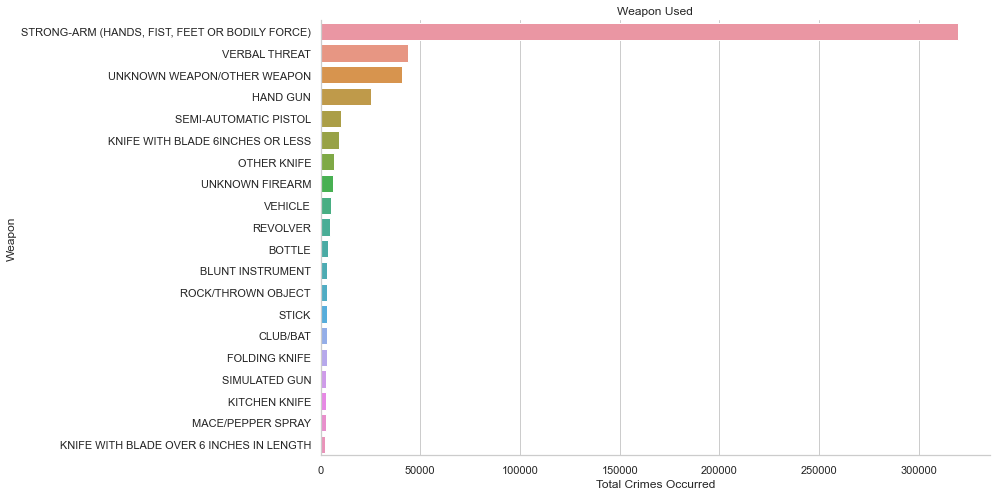

In [238]:
fig, ax = plt.subplots()
# Plotting weapons used
sns.barplot(y=crime["Weapon Description"].value_counts().head(20).index,
                 x=crime["Weapon Description"].value_counts().head(20), ax=ax)
# Axes
ax.set_title("Weapon Used")
ax.set_xlabel("Total Crimes Occurred")
ax.set_ylabel("Weapon")
sns.despine()

## 3.7. Status Description

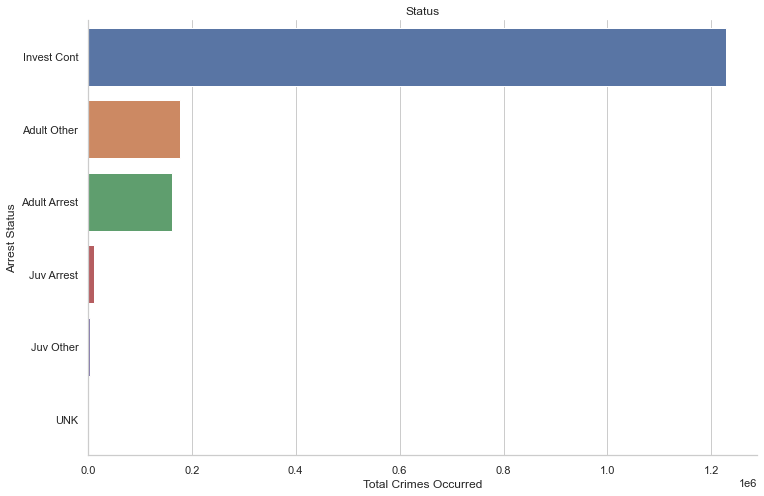

In [239]:
fig, ax = plt.subplots()
# Plotting the arrest status
sns.barplot(y=crime["Status Description"].value_counts().index,
                 x=crime["Status Description"].value_counts(), ax=ax)
# Axes
ax.set_title("Status")
ax.set_xlabel("Total Crimes Occurred")
ax.set_ylabel("Arrest Status")
sns.despine()

## 3.8. Crime Code

In [240]:
# Making a new dataframe
CC_list = []
for i in range(1,5):
    for item in crime["Crime Code "+str(i)].dropna():
        CC_list.append("Code " +str(int(item)))
        
tempo_CC = np.array(CC_list)

CC_df = pd.DataFrame(tempo_CC)
CC_df = CC_df.rename(columns = {0 : "Crime Codes"})

C:\Users\jaron\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


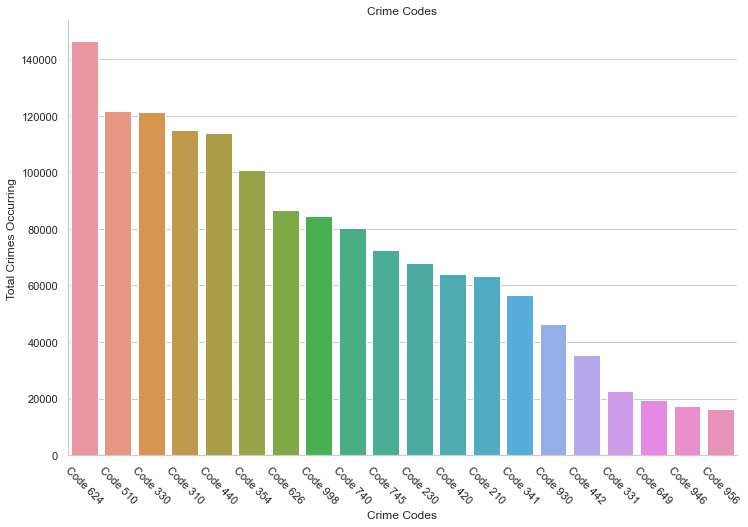

In [241]:
fig, ax = plt.subplots()
# Plotting crime codes
ax = sns.barplot(CC_df["Crime Codes"].value_counts().head(20).index, CC_df["Crime Codes"].value_counts().head(20))
# Axes
ax.set_title("Crime Codes")
ax.set_xticklabels(ax.get_xticklabels(), rotation=-45)
ax.set_xlabel("Crime Codes")
ax.set_ylabel("Total Crimes Occurring")
sns.despine()

# 4. Data Exploration

## 4.1. Are certain genders more prone to become victims for certain crimes?

In [245]:
# Removing Entries for X and H and - (by elimination)
crime["Victim Gender"] = crime["Victim Sex"][crime["Victim Sex"] != "X"]
crime["Victim Gender"] = crime["Victim Gender"][crime["Victim Gender"] != "H"]
crime["Victim Gender"] = crime["Victim Gender"][crime["Victim Gender"] != "-"]

In [246]:
# Combining two columns into a dataframe
cc_vg = crime[["Crime Code Description", "Victim Gender"]]
# Dropping null values
cc_vg = cc_vg[pd.notnull(cc_vg["Victim Gender"])]

In [247]:
# Saving top 10 crimes
crimetop10 = cc_vg["Crime Code Description"].value_counts().head(10).index
# Choosing data that is included in the top 10 crimes (by selection)
crimecc = cc_vg.loc[cc_vg["Crime Code Description"].isin(crimetop10)]

In [248]:
# Group by Crime Code Description and Victim Gender
cc_gender = crimecc.groupby(["Crime Code Description", "Victim Gender"]).size().reset_index(name="Count")
cc_gender

,Crime Code Description,Victim Gender,Count
0,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",F,18422
1,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",M,49034
2,BATTERY - SIMPLE ASSAULT,F,77588
3,BATTERY - SIMPLE ASSAULT,M,68070
4,BURGLARY,F,46685
5,BURGLARY,M,65197
6,BURGLARY FROM VEHICLE,F,54761
7,BURGLARY FROM VEHICLE,M,66187
8,INTIMATE PARTNER - SIMPLE ASSAULT,F,69360
9,INTIMATE PARTNER - SIMPLE ASSAULT,M,16524


C:\Users\jaron\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\jaron\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\categorical.py:3723: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


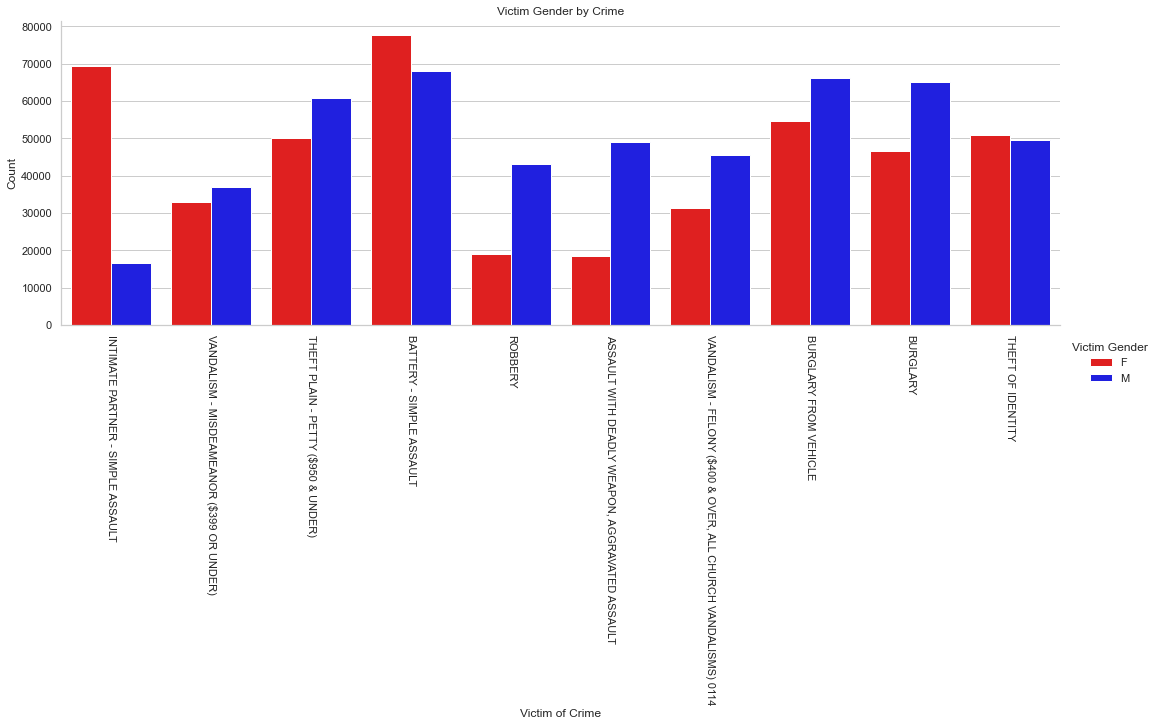

In [249]:
# Factorplot Crime and Gender based on count
ax = sns.factorplot(x="Crime Code Description", hue="Victim Gender", kind="count", data=crimecc, size=5, aspect=3, 
                    palette=["red", "blue"])
# Axes
plt.title("Victim Gender by Crime")
ax.set_xticklabels(rotation=-90)
ax.set_xlabels("Victim of Crime")
ax.set_ylabels("Count")
sns.despine()

## 4.2. Gun Crimes and Hour Occurred

In [250]:
# Filtering only rows with Hand guns or Semi-automatic pistols (by equal to)
crime["Guns Only"] = crime["Weapon Description"][(crime["Weapon Description"] == "HAND GUN") | 
                                                 (crime["Weapon Description"] == "SEMI-AUTOMATIC PISTOL")]

In [251]:
# Group by Guns Only and Hour Occurred
cc_gender = crime.groupby(["Hour Occurred", "Guns Only"]).size().reset_index(name="Count")
cc_gender.tail(6)

,Hour Occurred,Guns Only,Count
42,21,HAND GUN,2066
43,21,SEMI-AUTOMATIC PISTOL,753
44,22,HAND GUN,1932
45,22,SEMI-AUTOMATIC PISTOL,690
46,23,HAND GUN,1837
47,23,SEMI-AUTOMATIC PISTOL,711


C:\Users\jaron\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\jaron\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\categorical.py:3723: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


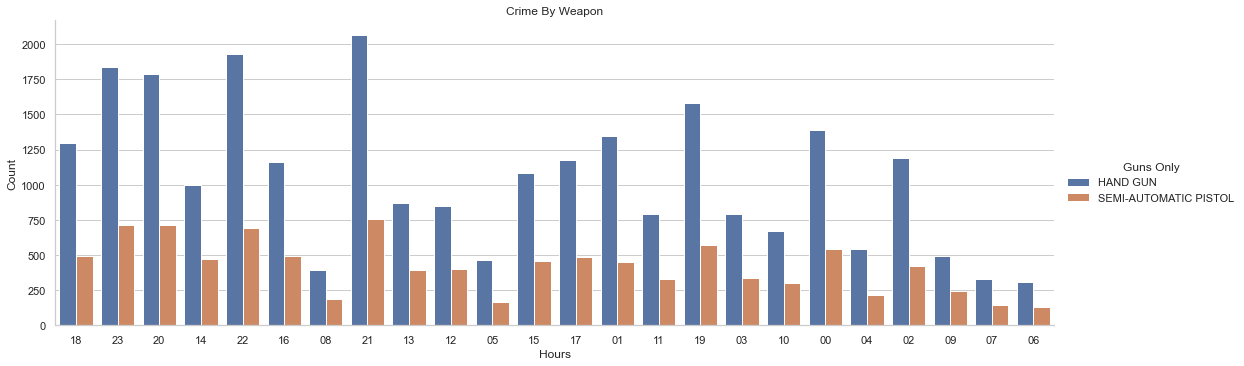

In [252]:
# Factorplot Crimes by Weapon used
ax = sns.factorplot(x="Hour Occurred", hue="Guns Only", kind="count", data=crime, size=5, aspect=3)
# Axes
plt.title("Crime By Weapon")
ax.set_xlabels("Hours")
ax.set_ylabels("Count")
sns.despine()

## 4.3. Premise and Hour Occurred

In [253]:
crime["Premise Description"].value_counts().head(5)

STREET                                          352160
SINGLE FAMILY DWELLING                          328198
MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)    204980
PARKING LOT                                     112576
SIDEWALK                                         79247
Name: Premise Description, dtype: int64

In [254]:
# Filtering crimes that happen by top 5 by (by equal to)
crime["Public Premise"] = crime["Premise Description"][(crime["Premise Description"] == "STREET") |
                                                       (crime["Premise Description"] == "SINGLE FAMILY DWELLING") | 
                                                       (crime["Premise Description"] == "MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)") |
                                                       (crime["Premise Description"] == "PARKING LOT") |
                                                       (crime["Premise Description"] == "SIDEWALK")]

C:\Users\jaron\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\jaron\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\categorical.py:3723: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


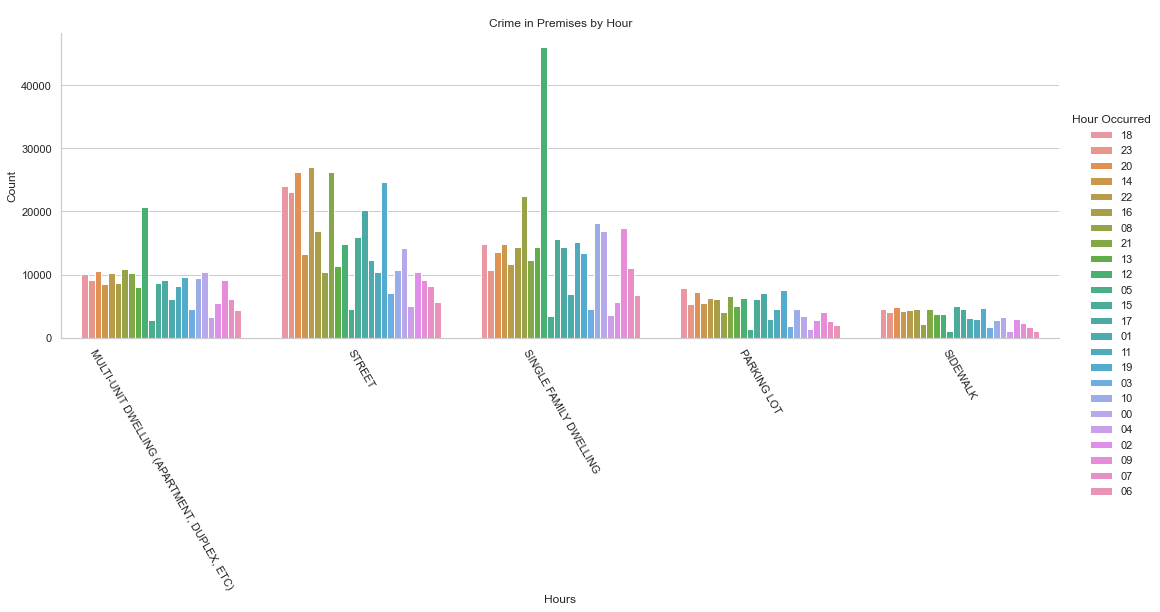

In [255]:
# Factorplot Crime and Gender based on count
ax = sns.factorplot(x="Public Premise", hue="Hour Occurred", kind="count", data=crime, size=5, aspect=3)
# Axes
plt.title("Crime in Premises by Hour")
ax.set_xticklabels(rotation=-60)
ax.set_xlabels("Hours")
ax.set_ylabels("Count")
sns.despine()

## 4.3 Premise and Type of Crime

In [256]:
# Saving top 10 types of crime
crimetoptype = crime["Crime Code Description"].value_counts().head(16).index
# Choosing data that is included in the top 10 types of crimes (by selection)
crimepremtype = crime.loc[crime["Crime Code Description"].isin(crimetoptype)]

C:\Users\jaron\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\jaron\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\categorical.py:3723: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


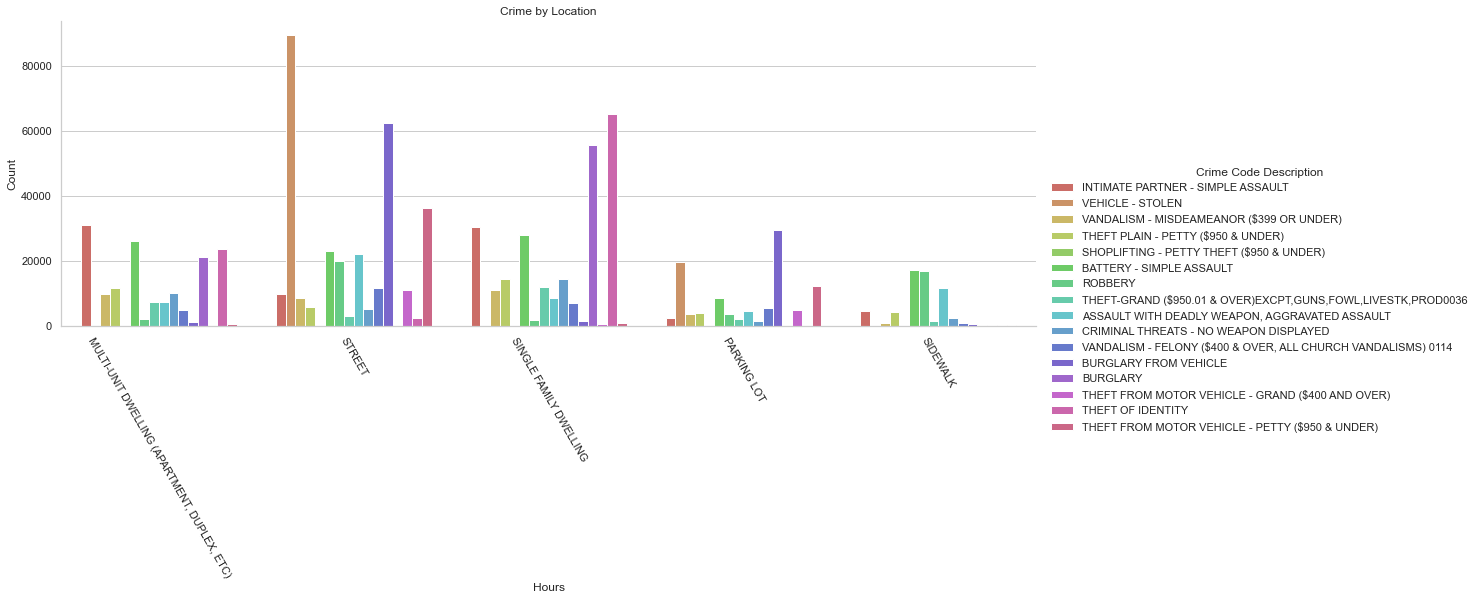

In [257]:
# Type of Crime by Location
sns.set_palette("hls", n_colors=16)
ax = sns.factorplot(x="Public Premise", hue="Crime Code Description", kind="count", data=crimepremtype, size=5, aspect=3)
# Axes
plt.title("Crime by Location")
ax.set_xticklabels(rotation=-60)
ax.set_xlabels("Hours")
ax.set_ylabels("Count")
sns.despine()

## 4.5. Juvenile Arrests

In [258]:
# Filtering the dataset with juvenile arrests (by selection)
crimejuv = crime.loc[crime["Status Description"].isin(["Juv Arrest"])]

In [259]:
crimejuv.shape

(12619, 39)

In [260]:
# Resetting color and size from above
sns.set()
rcParams['figure.figsize'] = (12,8)

C:\Users\jaron\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


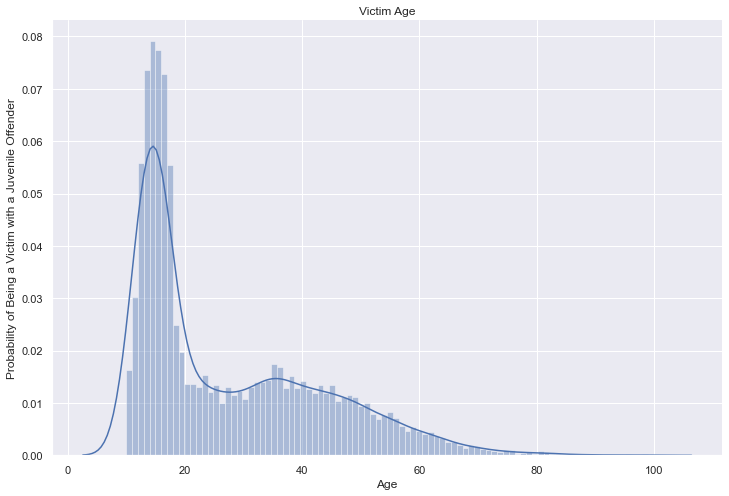

In [261]:
# Juvenile Victims Age Distribution
fig, ax = plt.subplots()
ax = sns.distplot(crimejuv["Victim Age"].dropna(), bins=90)
sns.set_style("whitegrid")
ax.set_title("Victim Age")
ax.set_ylabel("Probability of Being a Victim with a Juvenile Offender")
ax.set_xlabel("Age")
sns.despine()

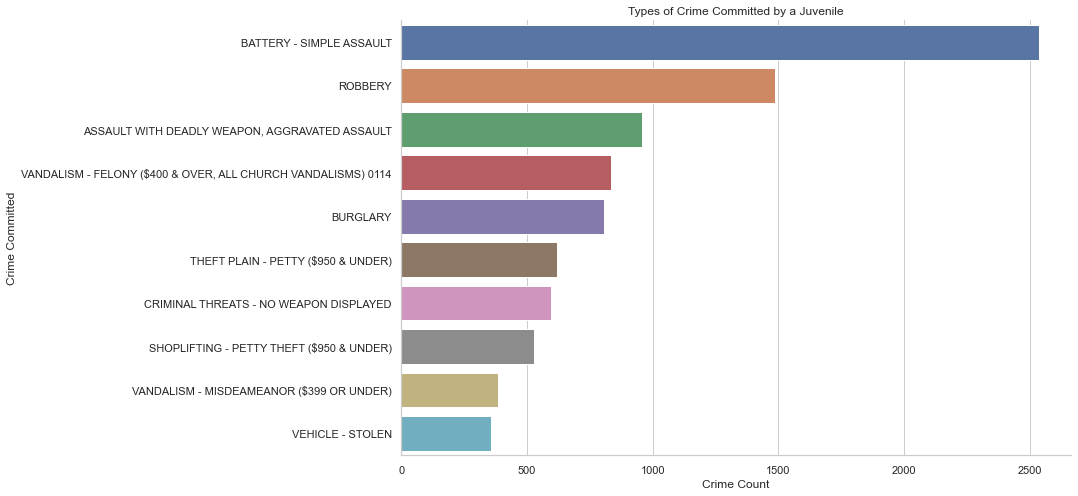

In [262]:
# Plotting top 10 types of crime committed by a juvenile.
fig, ax = plt.subplots()
# Axes
ax = sns.barplot(y=crimejuv["Crime Code Description"].value_counts().index[0:10], 
                 x=crimejuv["Crime Code Description"].value_counts().head(10))
ax.set_title("Types of Crime Committed by a Juvenile")
ax.set_xlabel("Crime Count")
ax.set_ylabel("Crime Committed")
sns.despine()

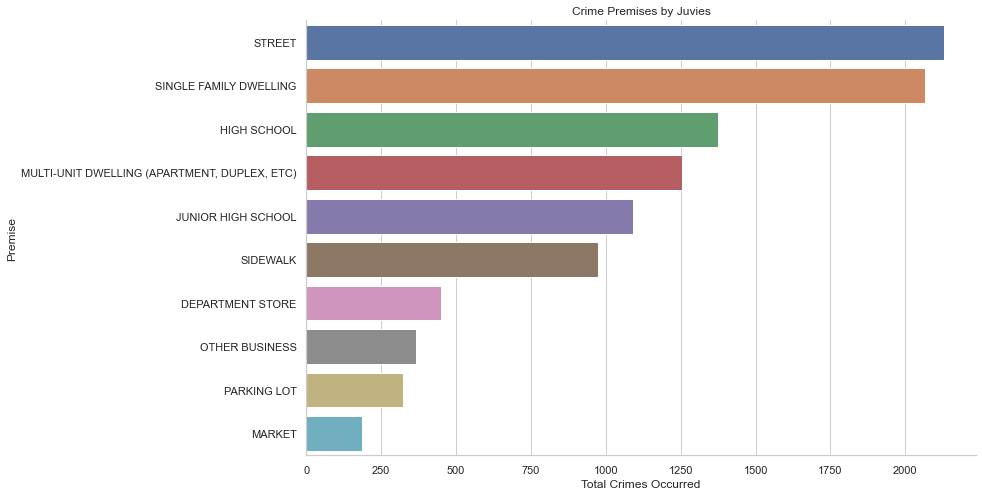

In [263]:
fig, ax = plt.subplots()
# Top 10 premises of crime by a juvie
ax = sns.barplot(y=crimejuv["Premise Description"].value_counts().head(10).index,
                 x=crimejuv["Premise Description"].value_counts().head(10))
# Axes
sns.set_style("whitegrid")
ax.set_title("Crime Premises by Juvies")
ax.set_xlabel("Total Crimes Occurred")
ax.set_ylabel("Premise")
sns.despine()

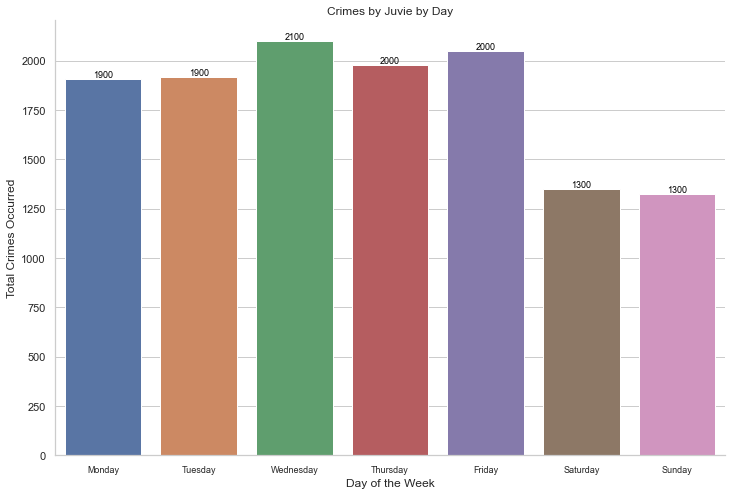

In [264]:
fig, ax = plt.subplots()
# Plotting crimes occurred by day
sns.barplot(x=crimejuv["Day Occurred"].value_counts().index, y=crimejuv["Day Occurred"].value_counts())
# Axes
ax.set_title("Crimes by Juvie by Day")
ax.set_xticklabels(["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"], fontsize=9)
ax.set_xlabel("Day of the Week")
ax.set_ylabel("Total Crimes Occurred")
# Adding values
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % round(int(p.get_height()), -2), 
            fontsize=9, color='black', ha='center', va='bottom')
sns.despine()

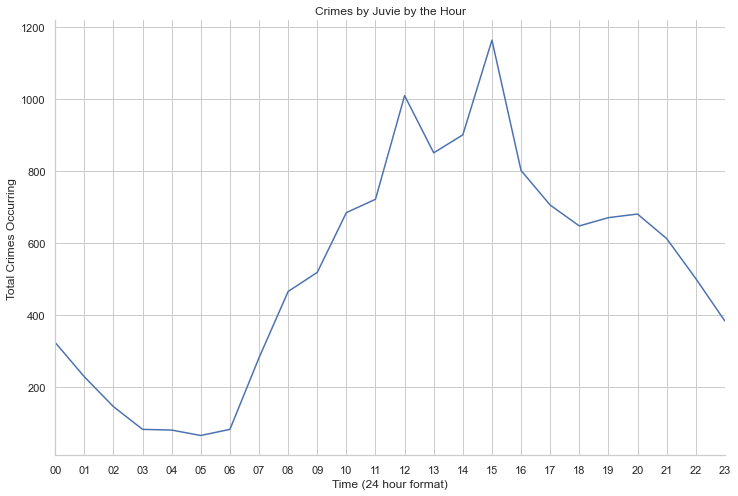

In [265]:
fig, ax = plt.subplots()
# Plotting crime through the hours
ax = plt.plot(crimejuv["Hour Occurred"].value_counts().sort_index().index, crimejuv["Hour Occurred"].value_counts().sort_index())
# Axes
plt.title("Crimes by Juvie by the Hour")
plt.xticks(range(24))
plt.xlim(0,23)
plt.xlabel("Time (24 hour format)")
plt.ylabel("Total Crimes Occurring")
sns.despine()

## 4.5. Difference of most dangerous and safest neighborhood by hour

In [266]:
# Taking the max and min value of crimes occurring by Area (by equal to)
crime["Dang and Safe Area"] = crime["Area Name"][(crime["Area Name"] == "77th Street") |
                                           (crime["Area Name"] == "Hollenbeck")]

In [267]:
# Grouping by the counts
areahour = crime.groupby(["Dang and Safe Area", "Hour Occurred"]).size().reset_index(name="Count")
areahour.head(10)

,Dang and Safe Area,Hour Occurred,Count
0,77th Street,00,4143
1,77th Street,01,3134
2,77th Street,02,2774
3,77th Street,03,2215
4,77th Street,04,1728
5,77th Street,05,1577
6,77th Street,06,2091
7,77th Street,07,3145
8,77th Street,08,4555
9,77th Street,09,4249


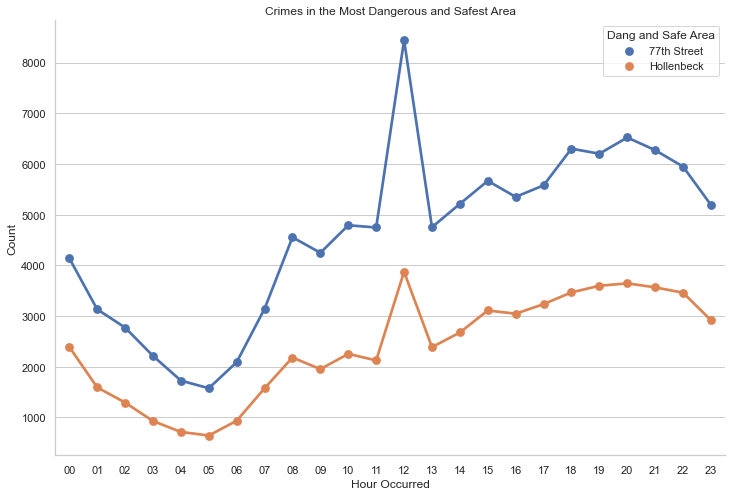

In [268]:
fig, ax = plt.subplots()
# Plotting crimes in the most dangerous and safest area by hour
sns.pointplot(x="Hour Occurred", y="Count", hue="Dang and Safe Area", data=areahour, ax=ax)
ax.set_title("Crimes in the Most Dangerous and Safest Area")
ax.set_ylabel("Count")
sns.despine()

## 4.7. Crime Surge at 12PM

In [269]:
# Filtering data for only 12pm (by selection)
crimenoon = crime.loc[crime["Hour Occurred"].isin(["12"])]

# Taking only top 6 crimes
top6crimes = crimenoon["Crime Code Description"].value_counts().head(6).index
crimenoon = crimenoon.loc[crimenoon["Crime Code Description"].isin(top6crimes)]

# Taking only top 6 premises
top6premises = crimenoon["Premise Description"].value_counts().head(6).index
crimenoon = crimenoon.loc[crimenoon["Premise Description"].isin(top6premises)]

In [270]:
print("The shape is {}".format(crimenoon.shape))

The shape is (56183, 40)


In [271]:
ccpremnoon = crimenoon.groupby(["Crime Code Description", "Premise Description"]).size().reset_index(name="Count")

In [272]:
ccpremnoon.head()

,Crime Code Description,Premise Description,Count
0,BATTERY - SIMPLE ASSAULT,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",1231
1,BATTERY - SIMPLE ASSAULT,OTHER BUSINESS,444
2,BATTERY - SIMPLE ASSAULT,PARKING LOT,452
3,BATTERY - SIMPLE ASSAULT,SIDEWALK,821
4,BATTERY - SIMPLE ASSAULT,SINGLE FAMILY DWELLING,1455


In [273]:
ccpremise = ccpremnoon.pivot("Crime Code Description", "Premise Description", "Count")

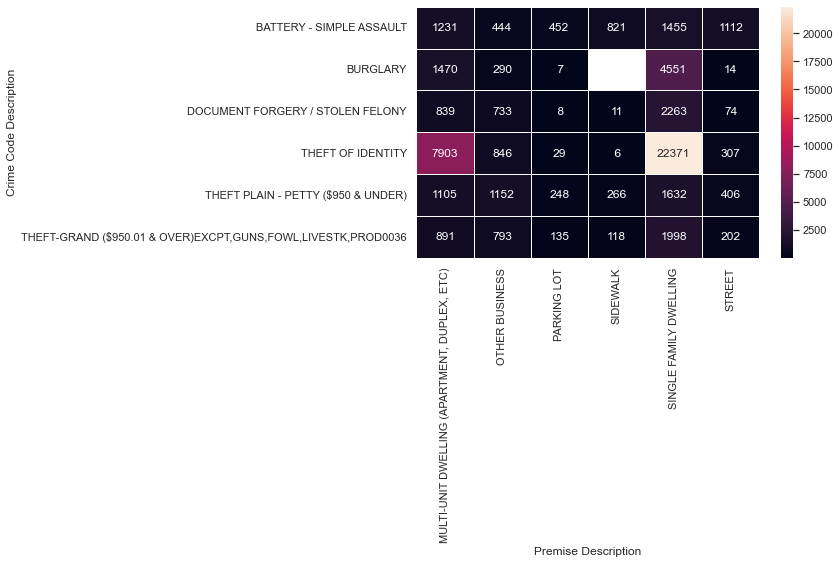

In [274]:
# Prepping data for heatmap
ccpremise = ccpremnoon.pivot("Crime Code Description", "Premise Description", "Count")

# Draw a heatmap with the numeric values in each cell
fig, ax = plt.subplots()
sns.heatmap(ccpremise, annot=True, linewidths=.5, ax=ax, fmt="2g")
fig.tight_layout()

In [275]:
# Get list of top 6 crimes
noidentheft = list(crimenoon["Crime Code Description"].value_counts().head(6).index)

# Remove identitfy theft since it doesn't really matter with time
try:
    noidentheft.pop(noidentheft.index("THEFT OF IDENTITY"))
except:
    print("Can't find THEFT OF IDENTITY")

In [276]:
# Make new dataset without identity theft
crimenoon2 = crimenoon.loc[crimenoon["Crime Code Description"].isin(noidentheft)]

In [277]:
# Groupby crime code and premise
ccpremnoon2 = crimenoon2.groupby(["Crime Code Description", "Premise Description"]).size().reset_index(name="Count")

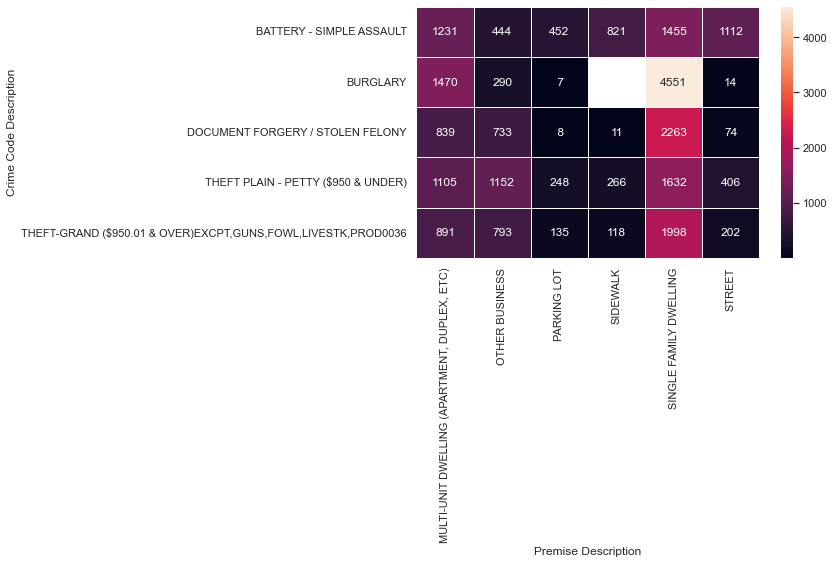

In [278]:
# Prepping data for heatmap
ccpremise2 = ccpremnoon2.pivot("Crime Code Description", "Premise Description", "Count")

# Draw a heatmap with the numeric values in each cell
fig, ax = plt.subplots()
sns.heatmap(ccpremise2, annot=True, linewidths=.5, ax=ax, fmt="2g")
fig.tight_layout()

## 4.7. Identity Theft Victims

In [279]:
# Filter data with only Identity Theft crimes
identheftvic = crime[crime["Crime Code Description"] == "THEFT OF IDENTITY"]

In [280]:
# Create subset with victim gender and age, then drop Na Values
identheftvic = identheftvic[["Victim Gender", "Victim Age"]]
identheftvic = identheftvic.dropna()

Text(0.5, 1.0, 'Victims of Identity Theft')

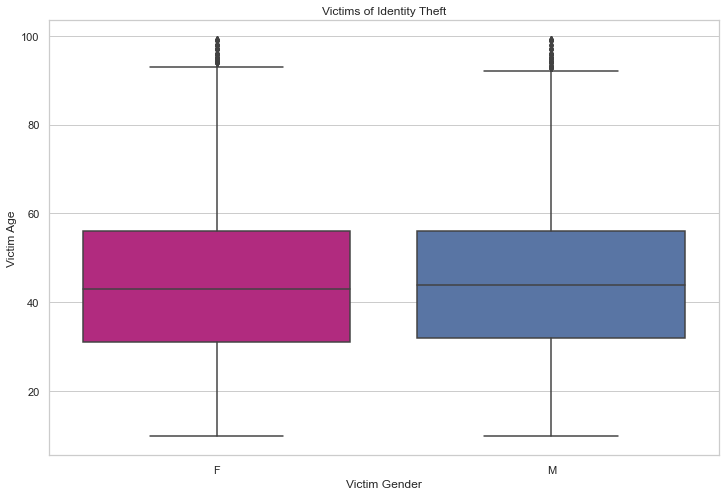

In [281]:
# Plot victims by gender and age
sns.boxplot(y="Victim Age", x="Victim Gender", data=identheftvic, palette={"M": "b", "F": "mediumvioletred"})
# Axes
plt.title("Victims of Identity Theft")

## 4.8. Monthly Crime without 2017

In [282]:
# Filtering 2017 out of the dataframe
crimeno17 = crime.loc[crime["Year Occurred"].isin(range(2010, 2017))]

In [283]:
# Making a new dataframe
df4 = pd.DataFrame({
    'Month': list(crimeno17["Month Reported"].value_counts().index),
    'Crime Reported': list(crimeno17["Month Reported"].value_counts()),
    'Crime Occurred': list(crimeno17["Month Occurred"].value_counts())
})
monrepoccclean = df4.set_index("Month").stack().reset_index().rename(columns={"level_1" : "Variable", 0 : "Crime"})

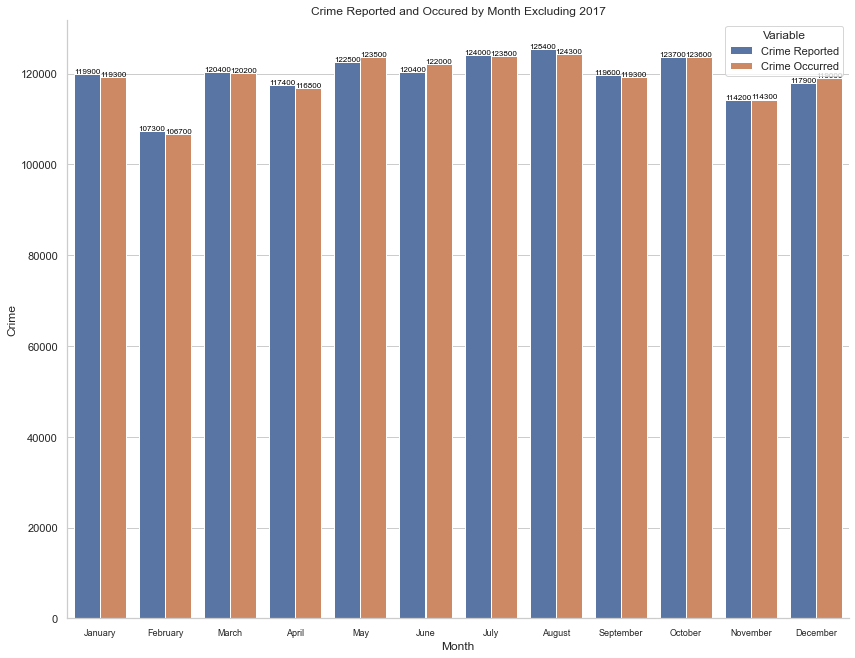

In [284]:
fig, ax = plt.subplots(figsize=(14,11))
# Plotting side by side crime rep and occ by day
sns.barplot(x = "Month", y = "Crime", hue = "Variable", data=monrepoccclean, ax=ax)
# Axes
ax.set_title("Crime Reported and Occured by Month Excluding 2017")
ax.set_xticklabels(["January", "February", "March", "April", "May", "June",
                    "July", "August", "September", "October", "November", "December"], fontsize=9)
ax.set_ylabel("Crime")
# Adding values
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % round(int(p.get_height()), -2), 
            fontsize=8, color='black', ha='center', va='bottom')
sns.despine(fig)

# 5. Machine Learning

## Import and Format

In [317]:
# Machine Learning Packages

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split


In [318]:
crime_df = pd.read_csv(path)

In [319]:
crime_df['Date Occurred'] = pd.to_datetime(
    crime_df['Date Occurred'].astype(str), errors='coerce')
crime_df['Date Occurred'] = pd.to_datetime(
    crime_df['Date Occurred'], format='%d/%m/%Y %H:%M:%S')

crime_df.head(5)

,DR Number,Date Reported,Date Occurred,Time Occurred,Area ID,Area Name,Reporting District,Crime Code,Crime Code Description,MO Codes,...,Weapon Description,Status Code,Status Description,Crime Code 1,Crime Code 2,Crime Code 3,Crime Code 4,Address,Cross Street,Location
0,1208575,03/14/2013,2013-03-11,1800,12,77th Street,1241,626,INTIMATE PARTNER - SIMPLE ASSAULT,0416 0446 1243 2000,...,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",AO,Adult Other,626.0,NaN,NaN,NaN,6300 BRYNHURST AV,NaN,"(33.9829, -118.3338)"
1,102005556,01/25/2010,2010-01-22,2300,20,Olympic,2071,510,VEHICLE - STOLEN,NaN,...,NaN,IC,Invest Cont,510.0,NaN,NaN,NaN,VAN NESS,15TH,"(34.0454, -118.3157)"
2,418,03/19/2013,2013-03-18,2030,18,Southeast,1823,510,VEHICLE - STOLEN,NaN,...,NaN,IC,Invest Cont,510.0,NaN,NaN,NaN,200 E 104TH ST,NaN,"(33.942, -118.2717)"
3,101822289,11/11/2010,2010-11-10,1800,18,Southeast,1803,510,VEHICLE - STOLEN,NaN,...,NaN,IC,Invest Cont,510.0,NaN,NaN,NaN,88TH,WALL,"(33.9572, -118.2717)"
4,42104479,01/11/2014,2014-01-04,2300,21,Topanga,2133,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),0329,...,NaN,IC,Invest Cont,745.0,NaN,NaN,NaN,7200 CIRRUS WY,NaN,"(34.2009, -118.6369)"


## Linear Regression - Auto - Day

In [320]:
column_1 = crime_df.iloc[:, 2]
column_1[1]

Timestamp('2010-01-22 00:00:00')

In [321]:

db = pd.DataFrame({"year": column_1.dt.year,
                   "month": column_1.dt.month,
                  "day": column_1.dt.day,
                   #               "dayofyear": column_1.dt.dayofyear,
                   #               "week": column_1.dt.week,
                   #               "weekofyear": column_1.dt.weekofyear,
                   "dayofweek": column_1.dt.dayofweek,
                   "quarter": column_1.dt.quarter,
                   })


In [322]:
dataset1 = crime_df.drop('Date Occurred', axis=1)
data1 = pd.concat([db, dataset1], axis=1)
data1


,year,month,day,dayofweek,quarter,DR Number,Date Reported,Time Occurred,Area ID,Area Name,...,Weapon Description,Status Code,Status Description,Crime Code 1,Crime Code 2,Crime Code 3,Crime Code 4,Address,Cross Street,Location
0,2013,3,11,0,1,1208575,03/14/2013,1800,12,77th Street,...,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",AO,Adult Other,626.0,NaN,NaN,NaN,6300 BRYNHURST AV,NaN,"(33.9829, -118.3338)"
1,2010,1,22,4,1,102005556,01/25/2010,2300,20,Olympic,...,NaN,IC,Invest Cont,510.0,NaN,NaN,NaN,VAN NESS,15TH,"(34.0454, -118.3157)"
2,2013,3,18,0,1,418,03/19/2013,2030,18,Southeast,...,NaN,IC,Invest Cont,510.0,NaN,NaN,NaN,200 E 104TH ST,NaN,"(33.942, -118.2717)"
3,2010,11,10,2,4,101822289,11/11/2010,1800,18,Southeast,...,NaN,IC,Invest Cont,510.0,NaN,NaN,NaN,88TH,WALL,"(33.9572, -118.2717)"
4,2014,1,4,5,1,42104479,01/11/2014,2300,21,Topanga,...,NaN,IC,Invest Cont,745.0,NaN,NaN,NaN,7200 CIRRUS WY,NaN,"(34.2009, -118.6369)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1584311,2017,9,7,3,3,172116482,09/07/2017,1005,21,Topanga,...,NaN,IC,Invest Cont,440.0,NaN,NaN,NaN,23800 CALVERT ST,NaN,"(34.1883, -118.6536)"
1584312,2017,9,7,3,3,172116489,09/07/2017,1200,21,Topanga,...,NaN,IC,Invest Cont,330.0,NaN,NaN,NaN,6600 TOPANGA CANYON BL,NaN,"(34.1905, -118.6059)"
1584313,2017,7,15,5,3,172116491,08/30/2017,1,21,Topanga,...,NaN,IC,Invest Cont,649.0,NaN,NaN,NaN,20900 SHERMAN WY,NaN,"(34.201, -118.5885)"
1584314,2017,9,8,4,3,172116498,09/08/2017,1845,21,Topanga,...,NaN,IC,Invest Cont,946.0,998.0,NaN,NaN,REMMET,WYANDOTTE,"(34.2029, -118.6003)"


In [323]:
model_small_df = data1.loc[data1['Crime Code 1'].isin([510.0])]
model_small_df.head()


,year,month,day,dayofweek,quarter,DR Number,Date Reported,Time Occurred,Area ID,Area Name,...,Weapon Description,Status Code,Status Description,Crime Code 1,Crime Code 2,Crime Code 3,Crime Code 4,Address,Cross Street,Location
1,2010,1,22,4,1,102005556,01/25/2010,2300,20,Olympic,...,NaN,IC,Invest Cont,510.0,NaN,NaN,NaN,VAN NESS,15TH,"(34.0454, -118.3157)"
2,2013,3,18,0,1,418,03/19/2013,2030,18,Southeast,...,NaN,IC,Invest Cont,510.0,NaN,NaN,NaN,200 E 104TH ST,NaN,"(33.942, -118.2717)"
3,2010,11,10,2,4,101822289,11/11/2010,1800,18,Southeast,...,NaN,IC,Invest Cont,510.0,NaN,NaN,NaN,88TH,WALL,"(33.9572, -118.2717)"
6,2010,1,27,2,1,101105609,01/28/2010,2230,11,Northeast,...,NaN,IC,Invest Cont,510.0,NaN,NaN,NaN,YORK,AVENUE 51,"(34.1211, -118.2048)"
7,2010,11,7,6,4,101620051,11/11/2010,1600,16,Foothill,...,NaN,IC,Invest Cont,510.0,NaN,NaN,NaN,EL DORADO,TRUESDALE,"(34.241, -118.3987)"


In [324]:
month = model_small_df.groupby('month')
month = month['Crime Code 1'].count()
month = month.reset_index()
month.head()


,month,Crime Code 1
0,1,11212
1,2,9506
2,3,10220
3,4,9961
4,5,10438


In [325]:
X = month.month.values.reshape(-1, 1)
y = month["Crime Code 1"].values.reshape(-1, 1)

print("Shape: ", X.shape, y.shape)


Shape:  (12, 1) (12, 1)


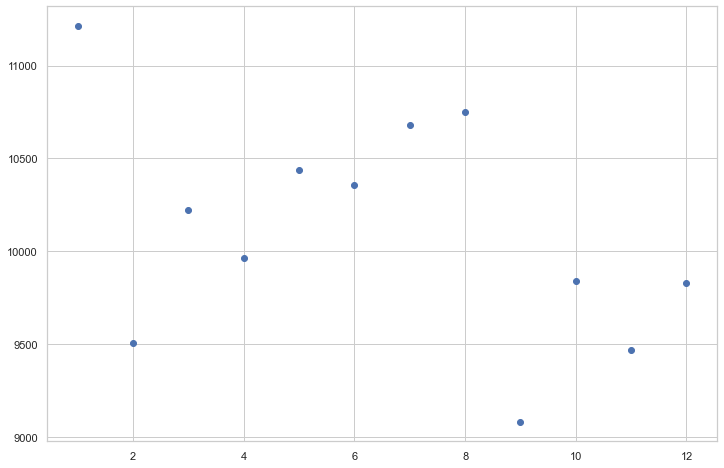

In [326]:
plt.scatter(X, y)


In [327]:
model = LinearRegression()
model.fit(X, y)
print('Weight coefficients: ', model.coef_)
print('y-axis intercept: ', model.intercept_)


Weight coefficients:  [[-74.93706294]]
y-axis intercept:  [10598.09090909]


In [328]:
x_min = np.array([[X.min()]])
x_max = np.array([[X.max()]])
y_min = model.predict(x_min)
y_max = model.predict(x_max)


Text(0.5, 0, 'Month')

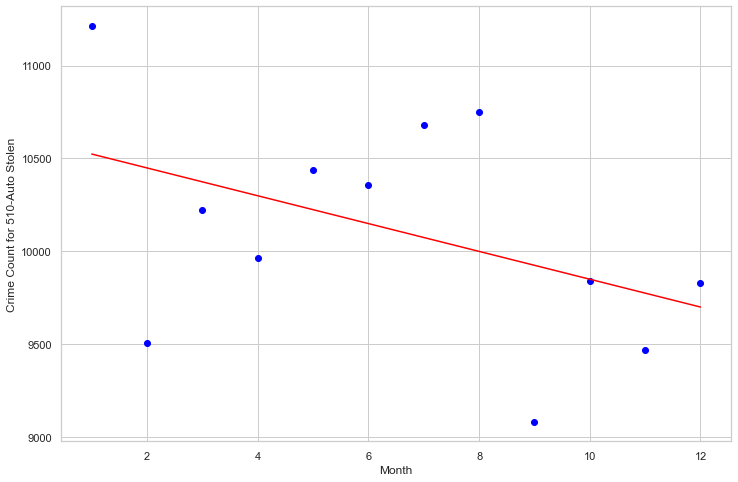

In [329]:
plt.scatter(X, y, c='blue')
plt.plot([x_min[0], x_max[0]], [y_min[0], y_max[0]], c='red')
plt.ylabel('Crime Count for 510-Auto Stolen')
plt.xlabel('Month')


## Linear Regression - Auto - Month

In [330]:
week = model_small_df.groupby('dayofweek')
week = week['Crime Code 1'].count()
week = week.reset_index()
week.head()


,dayofweek,Crime Code 1
0,0,16800
1,1,16750
2,2,17154
3,3,16952
4,4,18439


Shape:  (7, 1) (7, 1)


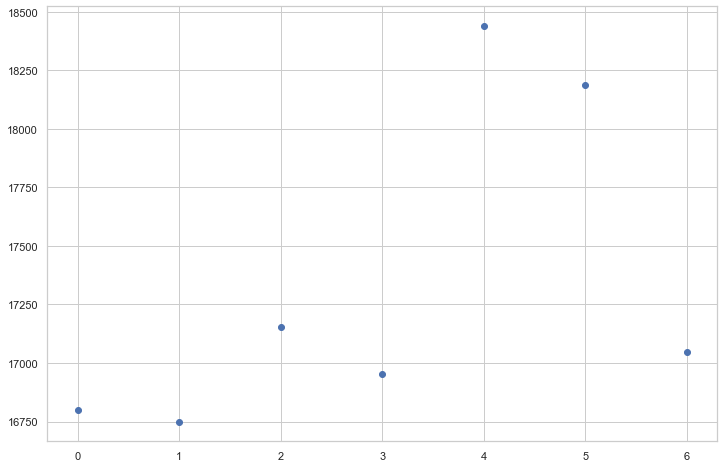

In [331]:
X = week.dayofweek.values.reshape(-1, 1)
y = week["Crime Code 1"].values.reshape(-1, 1)

print("Shape: ", X.shape, y.shape)
plt.scatter(X, y)


In [332]:
model = LinearRegression()
model.fit(X, y)
print('Weight coefficients: ', model.coef_)
print('y-axis intercept: ', model.intercept_)


Weight coefficients:  [[175.28571429]]
y-axis intercept:  [16807.28571429]


Text(0.5, 0, 'Week')

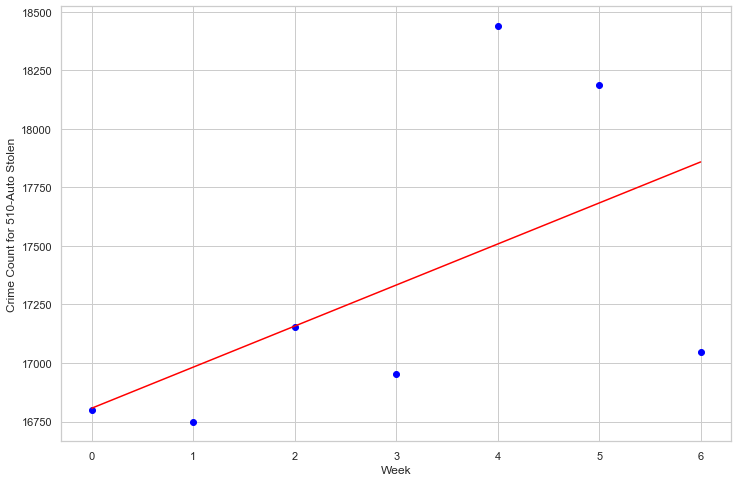

In [333]:
x_min = np.array([[X.min()]])
x_max = np.array([[X.max()]])
y_min = model.predict(x_min)
y_max = model.predict(x_max)
plt.scatter(X, y, c='blue')
plt.plot([x_min[0], x_max[0]], [y_min[0], y_max[0]], c='red')
plt.ylabel('Crime Count for 510-Auto Stolen')
plt.xlabel('Week')


## Linear Regression - Robbery - Month

In [334]:
model_210_df = data1.loc[data1['Crime Code 1'].isin([210])]
model_210_df.head()


,year,month,day,dayofweek,quarter,DR Number,Date Reported,Time Occurred,Area ID,Area Name,...,Weapon Description,Status Code,Status Description,Crime Code 1,Crime Code 2,Crime Code 3,Crime Code 4,Address,Cross Street,Location
28,2013,1,12,5,1,130100539,01/12/2013,1815,1,Central,...,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",IC,Invest Cont,210.0,NaN,NaN,NaN,BISHOPS,BROADWAY,"(34.0688, -118.2333)"
39,2013,1,20,6,1,130100564,01/20/2013,1430,1,Central,...,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",IC,Invest Cont,210.0,998.0,NaN,NaN,2ND,LOS ANGELES,"(34.0503, -118.2433)"
49,2013,1,25,4,1,130100583,01/25/2013,2305,1,Central,...,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",AA,Adult Arrest,210.0,998.0,NaN,NaN,100 W OLYMPIC BL,NaN,"(34.0405, -118.2567)"
50,2013,1,27,6,1,130100595,01/28/2013,1835,1,Central,...,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",AA,Adult Arrest,210.0,NaN,NaN,NaN,MAPLE AV,OLYMPIC BL,"(34.0383, -118.254)"
51,2013,1,28,0,1,130100597,01/29/2013,845,1,Central,...,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",AA,Adult Arrest,210.0,NaN,NaN,NaN,6TH,OLIVE,"(34.0481, -118.2542)"


In [335]:
month = model_210_df.groupby('month')
month = month['Crime Code 1'].count()
month = month.reset_index()
month.head()


,month,Crime Code 1
0,1,5548
1,2,4660
2,3,5302
3,4,5311
4,5,5720


Shape:  (12, 1) (12, 1)


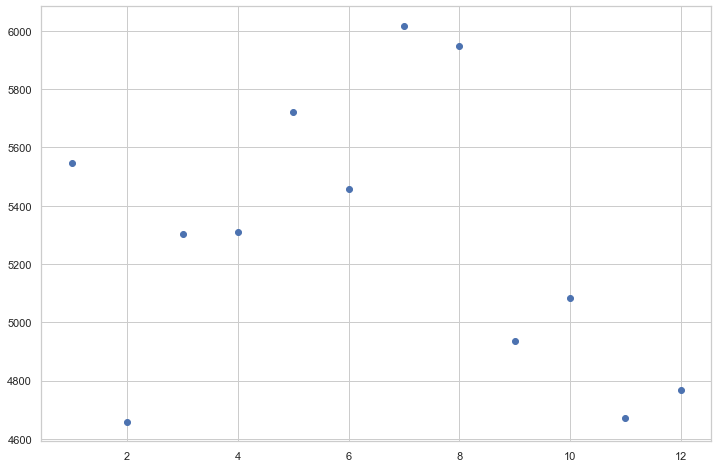

In [336]:
X = month.month.values.reshape(-1, 1)
y = month["Crime Code 1"].values.reshape(-1, 1)

print("Shape: ", X.shape, y.shape)
plt.scatter(X, y)


In [337]:
model = LinearRegression()
model.fit(X, y)
print('Weight coefficients: ', model.coef_)
print('y-axis intercept: ', model.intercept_)


Weight coefficients:  [[-37.13986014]]
y-axis intercept:  [5526.57575758]


Text(0.5, 0, 'Month')

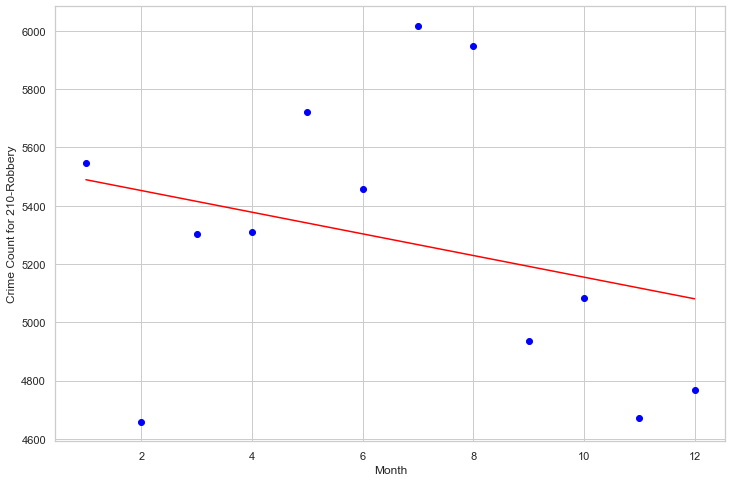

In [338]:
x_min = np.array([[X.min()]])
x_max = np.array([[X.max()]])
y_min = model.predict(x_min)
y_max = model.predict(x_max)
plt.scatter(X, y, c='blue')
plt.plot([x_min[0], x_max[0]], [y_min[0], y_max[0]], c='red')
plt.ylabel('Crime Count for 210-Robbery')
plt.xlabel('Month')


## Linear Regression - Robbery - Day

In [339]:
week = model_210_df.groupby('dayofweek')
week = week['Crime Code 1'].count()
week = week.reset_index()
week.head()


,dayofweek,Crime Code 1
0,0,9222
1,1,8635
2,2,8810
3,3,8695
4,4,9401


Shape:  (7, 1) (7, 1)


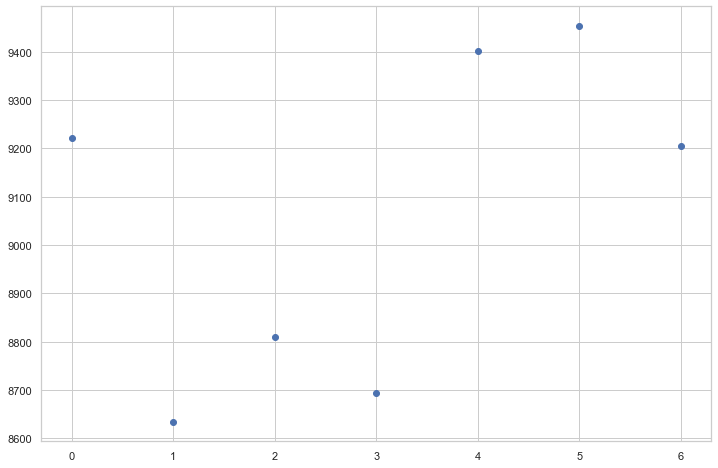

In [340]:
X = week.dayofweek.values.reshape(-1, 1)
y = week["Crime Code 1"].values.reshape(-1, 1)

print("Shape: ", X.shape, y.shape)

plt.scatter(X, y)


In [341]:
model = LinearRegression()
model.fit(X, y)
print('Weight coefficients: ', model.coef_)
print('y-axis intercept: ', model.intercept_)


Weight coefficients:  [[77.82142857]]
y-axis intercept:  [8826.82142857]


Text(0.5, 0, 'Week')

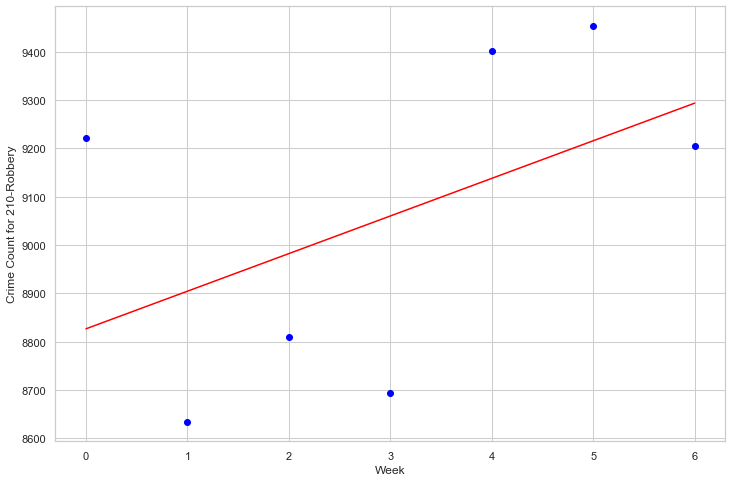

In [342]:
x_min = np.array([[X.min()]])
x_max = np.array([[X.max()]])
y_min = model.predict(x_min)
y_max = model.predict(x_max)
plt.scatter(X, y, c='blue')
plt.plot([x_min[0], x_max[0]], [y_min[0], y_max[0]], c='red')
plt.ylabel('Crime Count for 210-Robbery')
plt.xlabel('Week')

## Logistic Regression Classifier

In [343]:
model_small_df = data1.loc[data1['Crime Code 1'].isin([510])]
model_small_df.head()


,year,month,day,dayofweek,quarter,DR Number,Date Reported,Time Occurred,Area ID,Area Name,...,Weapon Description,Status Code,Status Description,Crime Code 1,Crime Code 2,Crime Code 3,Crime Code 4,Address,Cross Street,Location
1,2010,1,22,4,1,102005556,01/25/2010,2300,20,Olympic,...,NaN,IC,Invest Cont,510.0,NaN,NaN,NaN,VAN NESS,15TH,"(34.0454, -118.3157)"
2,2013,3,18,0,1,418,03/19/2013,2030,18,Southeast,...,NaN,IC,Invest Cont,510.0,NaN,NaN,NaN,200 E 104TH ST,NaN,"(33.942, -118.2717)"
3,2010,11,10,2,4,101822289,11/11/2010,1800,18,Southeast,...,NaN,IC,Invest Cont,510.0,NaN,NaN,NaN,88TH,WALL,"(33.9572, -118.2717)"
6,2010,1,27,2,1,101105609,01/28/2010,2230,11,Northeast,...,NaN,IC,Invest Cont,510.0,NaN,NaN,NaN,YORK,AVENUE 51,"(34.1211, -118.2048)"
7,2010,11,7,6,4,101620051,11/11/2010,1600,16,Foothill,...,NaN,IC,Invest Cont,510.0,NaN,NaN,NaN,EL DORADO,TRUESDALE,"(34.241, -118.3987)"


In [344]:
model_small_df = model_small_df[['DR Number', 'Crime Code 1', 'Premise Code']]
model_small_df = model_small_df.fillna(0)
model_small_df.reset_index()
model_small_df.head()


,DR Number,Crime Code 1,Premise Code
1,102005556,510.0,101.0
2,418,510.0,101.0
3,101822289,510.0,101.0
6,101105609,510.0,108.0
7,101620051,510.0,101.0


In [345]:
model_small_df['DR Number'] = model_small_df['DR Number'].apply(
    pd.to_numeric, errors='coerce')

model_small_df['Crime Code 1'] = model_small_df['Crime Code 1'].apply(
    pd.to_numeric, errors='coerce')

model_small_df['Premise Code'] = model_small_df['Premise Code'].apply(
    pd.to_numeric, errors='coerce')


In [346]:
model_small_df = model_small_df.fillna(0)
model_small_df.reset_index()
model_small_df.head(5)


,DR Number,Crime Code 1,Premise Code
1,102005556,510.0,101.0
2,418,510.0,101.0
3,101822289,510.0,101.0
6,101105609,510.0,108.0
7,101620051,510.0,101.0


In [347]:
X = model_small_df.drop("Premise Code", axis=1)
y = model_small_df["Premise Code"]
print(X.shape, y.shape)

(121332, 2) (121332,)


In [348]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
classifier = LogisticRegression()
classifier

classifier.fit(X_train, y_train)

print(f"Training Data Score: {classifier.score(X_train, y_train)}")
print(f"Testing Data Score: {classifier.score(X_test, y_test)}")

predictions = classifier.predict(X_test)
print(f"First 10 Predictions:   {predictions[:10]}")
print(f"First 10 Actual labels: {y_test[:10].tolist()}")


Training Data Score: 0.7375245881822877
Testing Data Score: 0.7327333267398543
First 10 Predictions:   [101. 101. 101. 101. 101. 101. 101. 101. 101. 101.]
First 10 Actual labels: [101.0, 101.0, 101.0, 101.0, 101.0, 104.0, 101.0, 101.0, 101.0, 101.0]


C:\Users\jaron\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## Random Forest Classifier

In [349]:
rf = RandomForestClassifier(n_estimators=20)
rf = rf.fit(X, y)
rf.score(X, y)


0.8950565390828471

## Grid Search Classification

In [350]:
importances = rf.feature_importances_
importances


array([1., 0.])

In [351]:
param_grid = {'C': [1, 5, 10, 50]}
grid = GridSearchCV(classifier, param_grid, verbose=3)
grid.fit(X, y)


Fitting 5 folds for each of 4 candidates, totalling 20 fits


C:\Users\jaron\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
C:\Users\jaron\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 1/5] END ...............................C=1;, score=0.736 total time=  33.0s


C:\Users\jaron\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 2/5] END ...............................C=1;, score=0.736 total time=  30.2s


C:\Users\jaron\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 3/5] END ...............................C=1;, score=0.736 total time=  32.4s


C:\Users\jaron\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 4/5] END ...............................C=1;, score=0.736 total time=  29.0s


C:\Users\jaron\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 5/5] END ...............................C=1;, score=0.736 total time=  30.9s


C:\Users\jaron\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 1/5] END ...............................C=5;, score=0.736 total time=  29.6s


C:\Users\jaron\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 2/5] END ...............................C=5;, score=0.736 total time=  36.8s


C:\Users\jaron\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 3/5] END ...............................C=5;, score=0.736 total time=  31.9s


C:\Users\jaron\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 4/5] END ...............................C=5;, score=0.736 total time=  28.3s


C:\Users\jaron\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 5/5] END ...............................C=5;, score=0.736 total time=  31.6s


C:\Users\jaron\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 1/5] END ..............................C=10;, score=0.736 total time=  28.9s


C:\Users\jaron\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 2/5] END ..............................C=10;, score=0.736 total time=  29.8s


C:\Users\jaron\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 3/5] END ..............................C=10;, score=0.736 total time=  30.5s


C:\Users\jaron\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 4/5] END ..............................C=10;, score=0.736 total time=  31.1s


C:\Users\jaron\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 5/5] END ..............................C=10;, score=0.736 total time=  39.4s


C:\Users\jaron\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 1/5] END ..............................C=50;, score=0.736 total time=  27.4s


C:\Users\jaron\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 2/5] END ..............................C=50;, score=0.736 total time=  27.9s


C:\Users\jaron\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 3/5] END ..............................C=50;, score=0.736 total time=  31.5s


C:\Users\jaron\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 4/5] END ..............................C=50;, score=0.736 total time=  29.7s


C:\Users\jaron\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 5/5] END ..............................C=50;, score=0.736 total time=  33.0s


C:\Users\jaron\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


GridSearchCV(estimator=LogisticRegression(), param_grid={'C': [1, 5, 10, 50]},
             verbose=3)

In [352]:
print(grid.best_params_)


{'C': 1}


In [353]:
print(grid.best_score_)


0.7363267731217805


In [354]:
predictions = grid.predict(X)
print(classification_report(y, predictions))

C:\Users\jaron\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jaron\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00         5
       101.0       0.74      1.00      0.85     89340
       102.0       0.00      0.00      0.00        61
       103.0       0.00      0.00      0.00       707
       104.0       0.00      0.00      0.00      5787
       105.0       0.00      0.00      0.00        87
       106.0       0.00      0.00      0.00         5
       107.0       0.00      0.00      0.00       118
       108.0       0.00      0.00      0.00     19701
       109.0       0.00      0.00      0.00        17
       110.0       0.00      0.00      0.00        10
       111.0       0.00      0.00      0.00         1
       115.0       0.00      0.00      0.00         3
       116.0       0.00      0.00      0.00        33
       118.0       0.00      0.00      0.00        65
       119.0       0.00      0.00      0.00         1
       120.0       0.00      0.00      0.00         3
       121.0       0.00    

C:\Users\jaron\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## KNN

In [355]:
#KNN
knn = KNeighborsClassifier(n_neighbors=1000)
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1000)

In [356]:
knn.score(X_test, y_test)


0.7327333267398543

In [357]:
knn.score(X_train, y_train)


0.7375245881822877

k: 1, Train/Test Score: 1.000/0.603
k: 3, Train/Test Score: 0.785/0.691
k: 5, Train/Test Score: 0.760/0.709
k: 7, Train/Test Score: 0.750/0.718
k: 9, Train/Test Score: 0.745/0.723
k: 11, Train/Test Score: 0.743/0.726
k: 13, Train/Test Score: 0.742/0.728
k: 15, Train/Test Score: 0.741/0.729
k: 17, Train/Test Score: 0.740/0.730
k: 19, Train/Test Score: 0.740/0.730


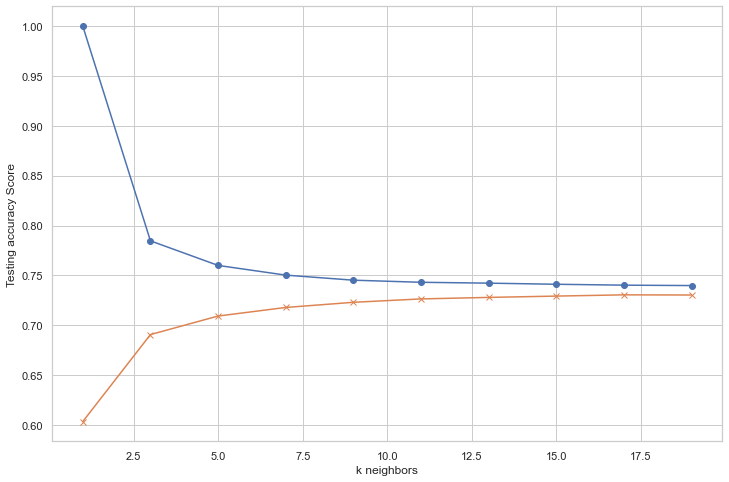

In [358]:
train_scores = []
test_scores = []
for k in range(1, 20, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    train_score = knn.score(X_train, y_train)
    test_score = knn.score(X_test, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")


plt.plot(range(1, 20, 2), train_scores, marker='o')
plt.plot(range(1, 20, 2), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.show()


# The End

In [359]:
modules = dir()
print(modules)

['CC_df', 'CC_list', 'CountVectorizer', 'GaussianNB', 'GridSearchCV', 'In', 'KFold', 'KNeighborsClassifier', 'LinearRegression', 'LogisticRegression', 'MO_list', 'Out', 'RandomForestClassifier', 'Victims_bg', 'X', 'XGBClassifier', 'X_test', 'X_train', '_', '_100', '_102', '_108', '_116', '_121', '_130', '_136', '_137', '_138', '_140', '_141', '_142', '_144', '_147', '_148', '_149', '_151', '_152', '_153', '_154', '_156', '_157', '_158', '_160', '_161', '_162', '_164', '_167', '_168', '_172', '_173', '_174', '_184', '_185', '_186', '_192', '_193', '_194', '_223', '_228', '_230', '_234', '_237', '_248', '_251', '_253', '_259', '_267', '_272', '_281', '_285', '_286', '_287', '_289', '_290', '_291', '_293', '_296', '_297', '_298', '_300', '_301', '_302', '_303', '_305', '_306', '_307', '_309', '_310', '_311', '_313', '_319', '_320', '_322', '_323', '_324', '_326', '_329', '_33', '_330', '_331', '_333', '_334', '_335', '_336', '_338', '_339', '_340', '_342', '_343', '_344', '_346', '_349', 

# Jaronchai Dilokkalayakul 2021610064